<a href="https://colab.research.google.com/github/Iqubal121/EDA_Projects/blob/main/PlayStore_App_Review_Analysis_EDA_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statements**
1. What are the top categories on Play Store?
2. Are majority of the apps Paid or Free?
3. How importance is the rating of the application?
4. Which categories from the audience should the app be based on?
5. Which category has the most no. of installations?
6. How does the count of apps varies by Genres?
7. How does the last update has an effect on the rating?
8. How are ratings affected when the app is a paid one?
9. How are reviews and ratings co-related?
10. Lets us discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. How Content Rating affect over the App?
15. Does Last Update date has an effects on rating?
16. Distribution of App update over the Year.
17. Distribution of Paid and Free app updated over the Month.

# Project Description

Play Store App Review Analysis is a powerful tool that utilizes advanced data analytics techniques to evaluate and gain insights from user reviews on the Google Play Store.

By leveraging this analysis, app developers can make data-driven decisions regarding app updates, bug fixes, feature enhancements, or even strategic changes. They can identify areas where their app excels and reinforce those aspects and address user complaints and suggestions to enhance user satisfaction and drive app ratings and reviews.
Play Store App Review Analysis is invaluable for understanding user sentiment, uncovering trends, and gaining actionable insights from user reviews. It empowers app developers and product teams to continuously improve their apps, enhance user experiences, and drive success in the highly competitive app market.

# Begin with Project with Play store data



In [465]:
# import all the library 

import numpy as np # import the numpy for numerical opeartions
import pandas as pd # for data cleaning and Manipulation
import matplotlib.pyplot as plt # for data visualation
import seaborn as sns # for data vidualization
from datetime import datetime

# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# ignore the warning 
import warnings
warnings.filterwarnings("ignore")

### import dataset

In [466]:
data = pd.read_csv("/content/Play Store Data.csv")
data.head(1)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [467]:
data.tail(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### view dataset

In [468]:
data.shape

(10841, 13)

### Information of the dataset

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the respective app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - IIt states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

In [470]:
# get the description of the dataset
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [471]:
# create a function for know about the missing value in the dataset
def missingValues():
  temp=pd.DataFrame(index=data.columns)
  temp["datatype"]=data.dtypes
  temp["not null values"]=data.count()
  temp["null value"]=data.isnull().sum()
  temp["% of the null value"]=data.isnull().mean()
  temp["unique count"]=data.nunique()
  return temp
missingValues()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


### In the above table we can see there are lost of null values, We'll treat the null values where the sum of the null value is smallest

In [472]:
# As we can see that the null is smallest in the features of android version
# let's find the null value and treat it
version_null = data[data["Android Ver"].isnull()]
version_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [473]:
# since we can see that there is very less number of NAN value so drop the null values
data=data[data['Android Ver'].notna()]
# Shape of the updated dataframe
data.shape

(10838, 13)

In [474]:
# Now we'll clean and treat the null value of the current version column, Since the number is null value is less than 10
current_ver = data[data["Current Ver"].isnull()]
current_ver

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [475]:
# drop the null value since there is small null values

In [476]:
data=data[data['Current Ver'].notna()]
# Shape of the updated dataframe
data.shape

(10830, 13)

In [477]:
# now we have the null values in only one column i.e Rating
rating_null = data[data["Rating"].isnull()]
rating_null.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [478]:
print(rating_null.shape)

(1470, 13)


In [479]:
# since there is a huge null dataset so we'll treat these data instead of froping the dataset

In [480]:
# firn the mead median and mode of the dataset of rating 
# Finding mean and median in the Rating column excluding the NaN values.
def rating_stat():
  temp=pd.DataFrame(index=data.columns)
  temp["mean"]= round(data[~data['Rating'].isnull()]['Rating'].mean(),4)
  temp["median"]= data[~data['Rating'].isnull()]['Rating'].median()
  return temp
rating_stat()
  

,mean,median
App,4.1918,4.3
Category,4.1918,4.3
Rating,4.1918,4.3
Reviews,4.1918,4.3
Size,4.1918,4.3
Installs,4.1918,4.3
Type,4.1918,4.3
Price,4.1918,4.3
Content Rating,4.1918,4.3
Genres,4.1918,4.3


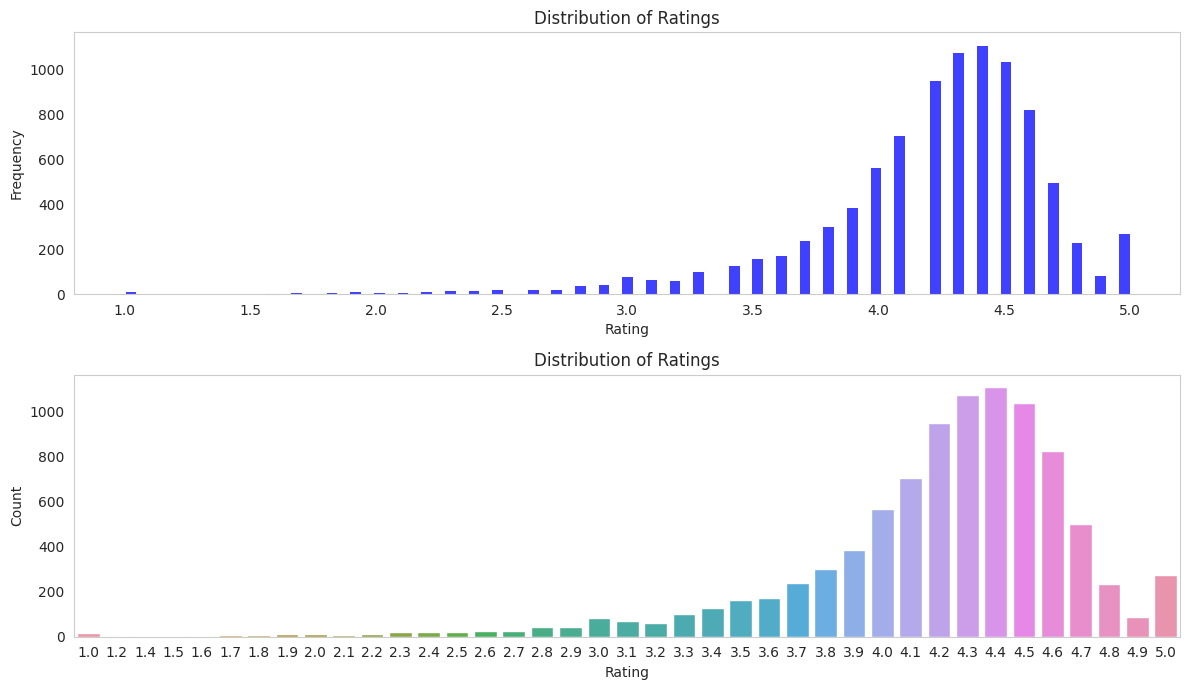

In [481]:
# visualize the null values for better understanding
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
sns.histplot(data['Rating'], color='blue', ax=ax[0])
# Add labels and title to the plot
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Ratings')

#  violin plot for count the rating
sns.countplot(x='Rating', data=data, ax=ax[1])
# Add labels and title to the plot
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Ratings')

plt.tight_layout()
plt.show()

In [482]:
#Replacing the NaN values in the 'Rating' colunm with its median value
mean = round(data[~data['Rating'].isnull()]['Rating'].mean(),4)
median = data[~data['Rating'].isnull()]['Rating'].median()
data['Rating'].fillna(value=median,inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [483]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Treat the data with and visualize the data

### find the number and type of the Applications in play stores


In [484]:
# Manipulate the app name
data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [485]:
# find and drop the duplicate value
data.drop_duplicates(subset = 'App', inplace = True)
data.shape

(9649, 13)

In [486]:
# check for the duplicate value
data['App'].duplicated().sum()

0

In [487]:
# check the datatype of LastUpdate column
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


### check the free or paid application and treat the price features of the dataset

In [488]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [489]:
# The drop_dollar funtion applied to the price column
data['Price']=data['Price'].apply(lambda x: convert_dollar(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [490]:
# find the paid application 
data[data['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


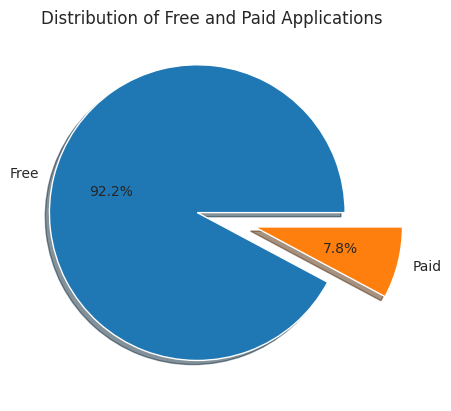

In [491]:
# Count the number of free and paid applications
counts = data['Type'].value_counts()
explode = (0.1, 0.3)
# Create a pie chart
plt.pie(counts.values, explode=explode, labels=counts.index,shadow= True, autopct='%1.1f%%')

# Customize the plot
plt.title('Distribution of Free and Paid Applications')

# Show the plot
plt.show()

### Treat the install features of the dataset 

In [492]:
# Checking the contents of the 'Installs' column
data['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [493]:
# check the datatypes of the features number of times install by the users.
type(data['Installs'][0])

str

In [494]:
# as we have seen the types of the data is in string forma so we have to convert it into the integer type and remove the + sign.

def remove_plus(item):
  if '+' and ',' in item: # remove + and , then convert it into the integer
    plus_and_comma = int(item[:-1].replace(',',''))
    return plus_and_comma
  elif '+' in item:
    plus = int(item[:-1])
    return plus
  else:
    return int(item)

In [495]:
# apply the function for reflect into the dataset
data['Installs'] = data['Installs'].apply(lambda x: remove_plus(x))

In [496]:
data['Installs'] # check for the reflections of the datatypes

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9649, dtype: int64

### Treat the size featurs of the dataset

In [497]:
data['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [498]:
# Here M is indicating the MB and K indicating the KB of the application size

def treat_size_of_the_size(item):
  try:
    if 'M' in item:
      return float(item[:-1])
    elif 'k' in item:
      return round(float(item[:-1])/1024, 4)
    else:
      return item
  except:
    return item

In [499]:
# apply into the dataset

data['Size'] = data['Size'].apply(lambda item: treat_size_of_the_size(item))
data['Size']

0                      19.0
1                      14.0
2                       8.7
3                      25.0
4                       2.8
                ...        
10836                  53.0
10837                   3.6
10838                   9.5
10839    Varies with device
10840                  19.0
Name: Size, Length: 9649, dtype: object

In [500]:
# convert the string data into the integer into the and replace the varies with device, with NaN values.
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))



In [501]:
# find the maximum_size of the application
max_size = data[data['Size'] != 'Varies with device']['Size'].max()

# find the minimum_size the application
min_size = data[data['Size'] != 'Varies with device']['Size'].min()

# find the mean_size of the application
mean_size = round(data[data['Size'] != 'Varies with device']['Size'].mean(),4)

# find the median_size of the application
median_size = data[data['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

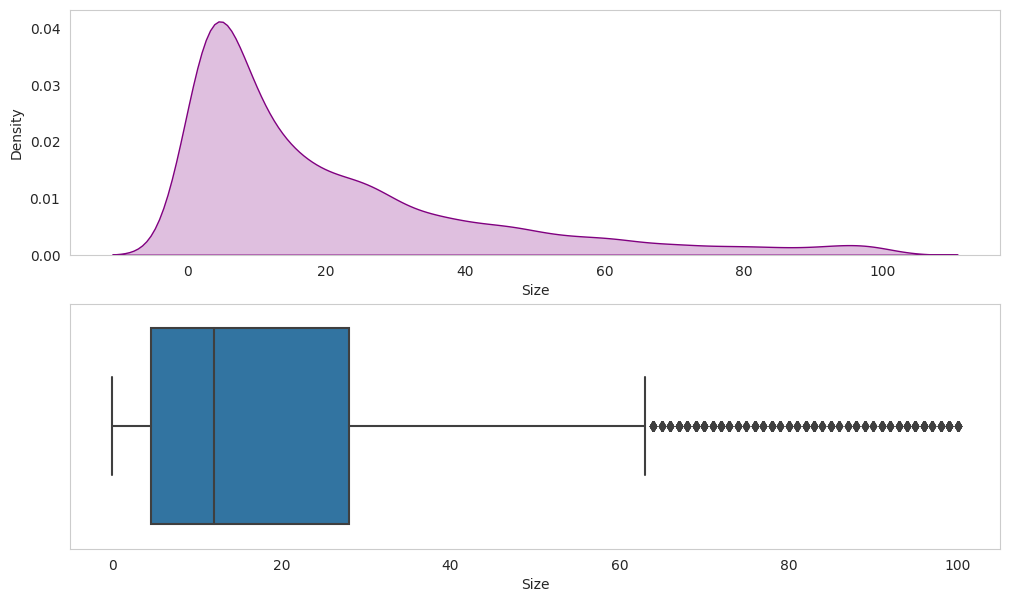

In [502]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
sns.kdeplot(data[data['Size'] != 'Varies with device']['Size'], fill=True, color='purple', ax=ax[0])
sns.boxplot(x='Size', data=data, ax=ax[1])
plt.show()


### Treat the review feature of the dataset

In [503]:
# converting the datatypes of features dataset
data['Reviews'] = data['Reviews'].astype(int)
data['Reviews']


0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 9649, dtype: int64

### Describes the dataset and visualize the dataset into the pair plot


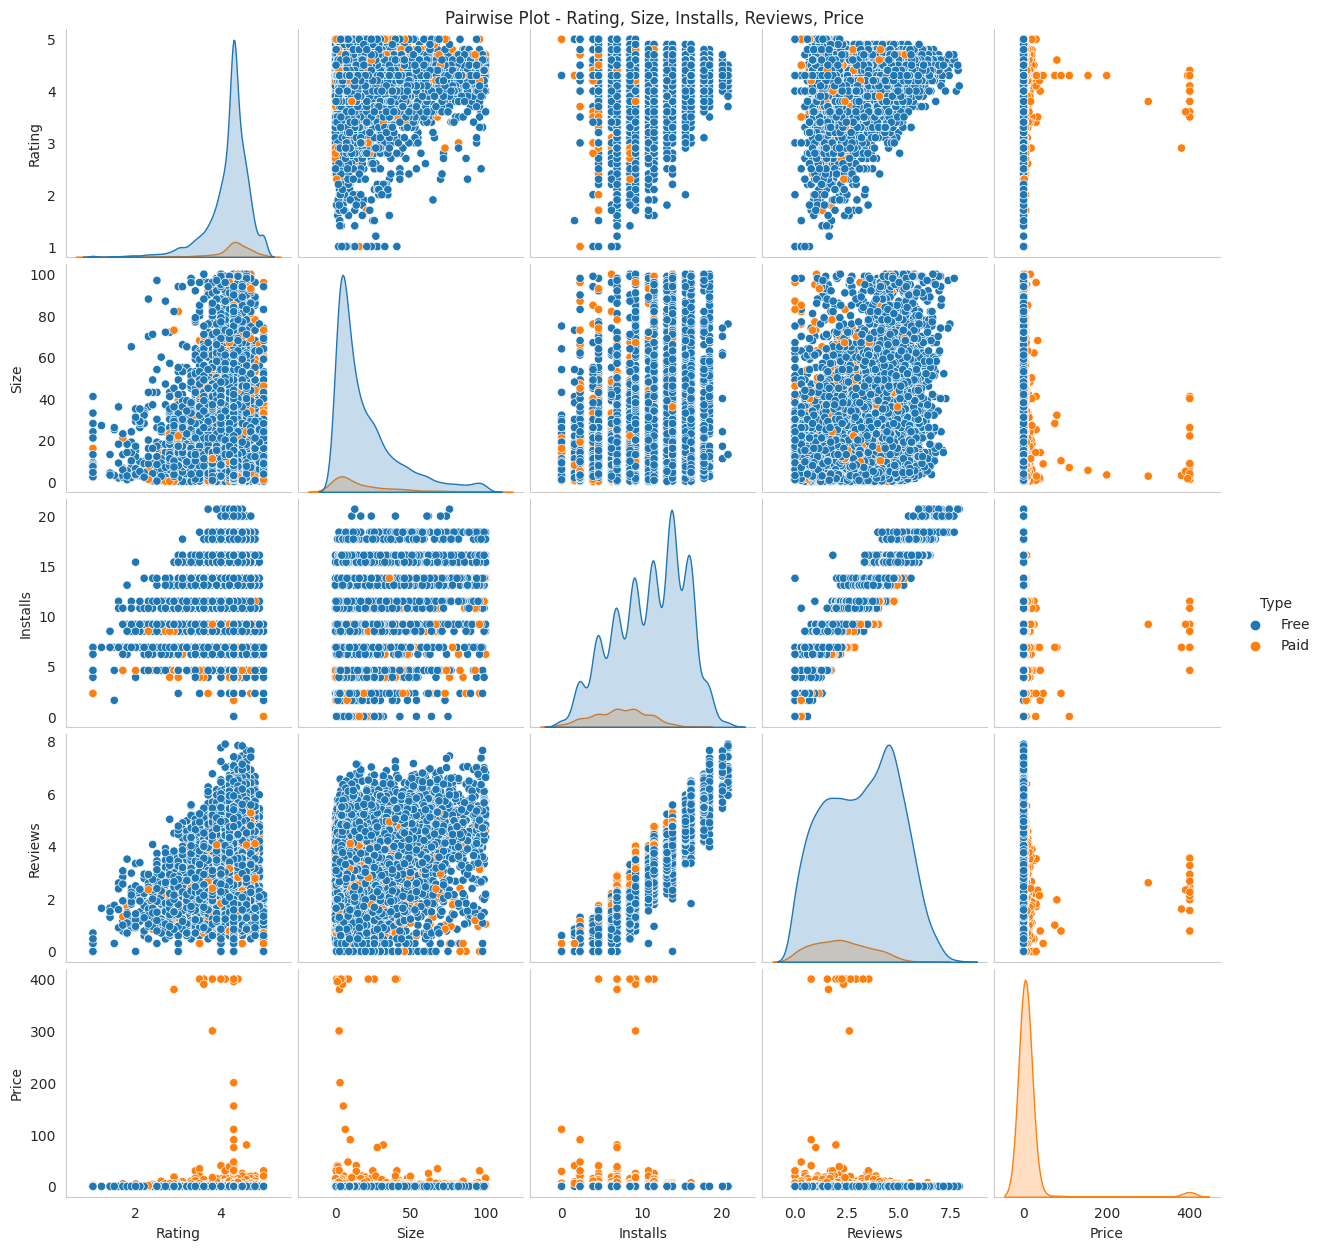

In [504]:
Rating = data['Rating']
Size = data['Size']
Installs = data['Installs']
Reviews = data['Reviews']
Type = data['Type']
Price = data['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=12)
plt.show()

### **FINDINGS**
* Most of the App are Free.
* Most of the Paid Apps have Rating around 4
* As the number of installation increases the number of reviews of the particaular app also increases.
*Most of the Apps are light-weighted.

<Figure size 1000x700 with 0 Axes>

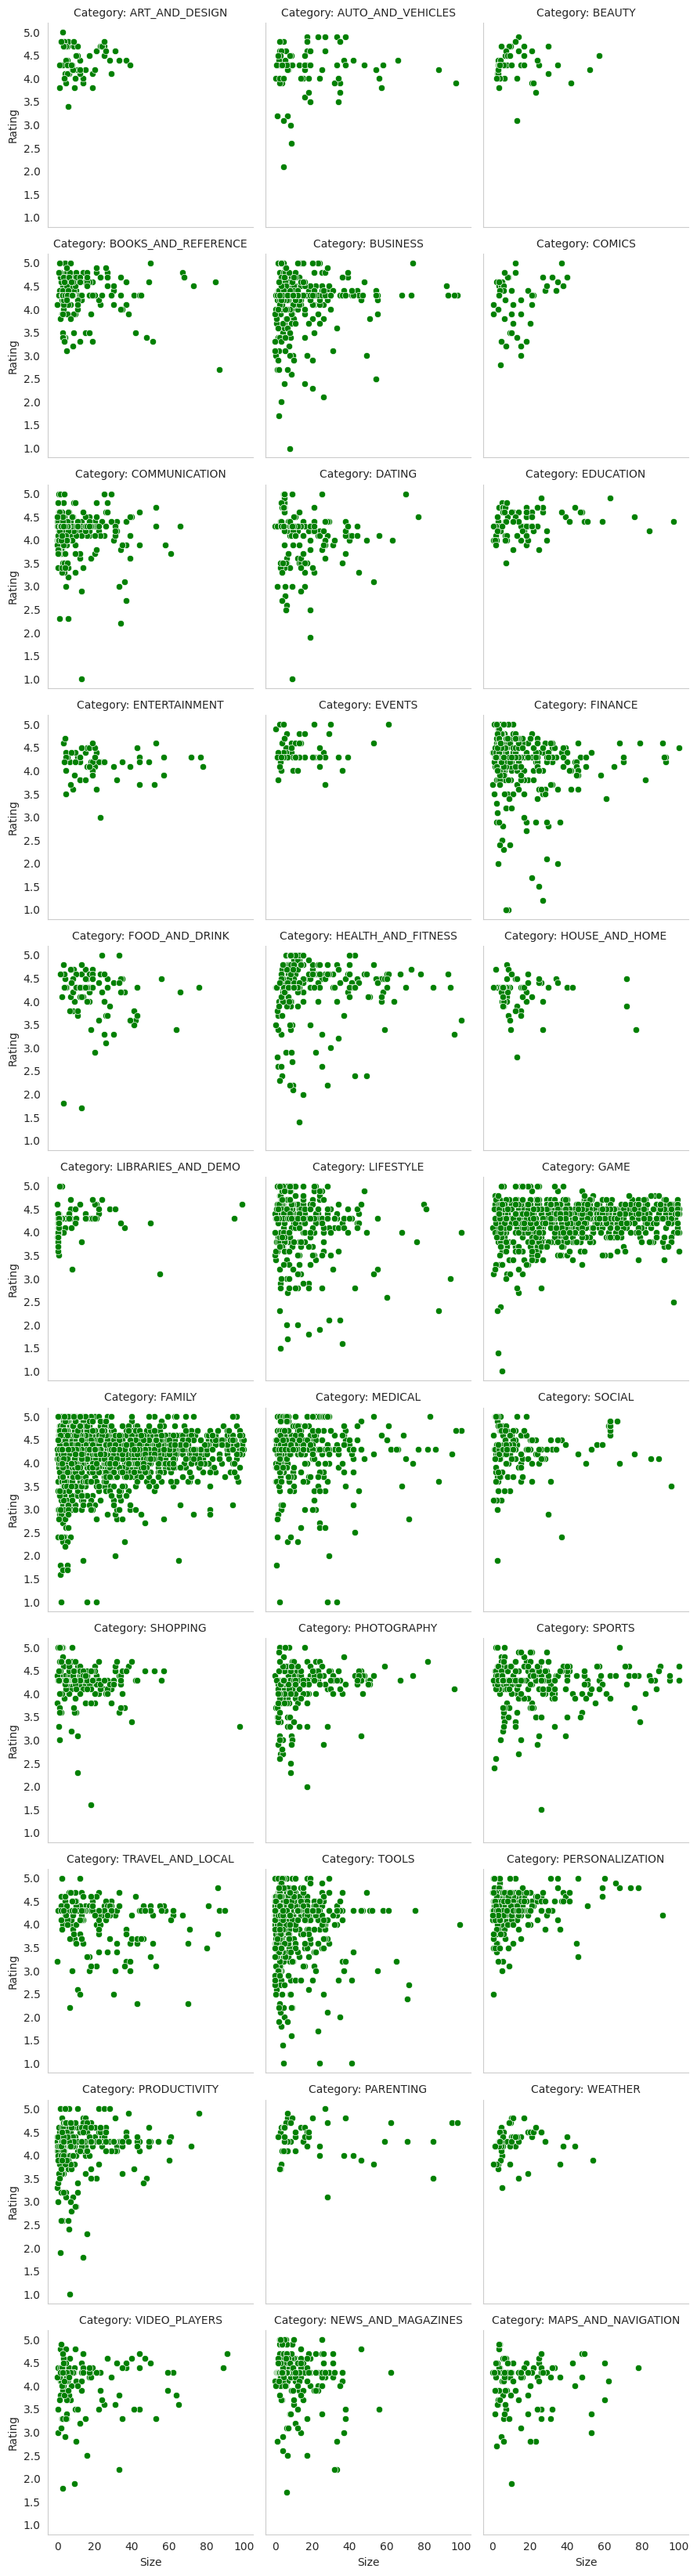

In [505]:
sns.set_style("whitegrid", {'axes.grid': False})

# Increase the figure size
plt.figure(figsize=(10, 7))

# Plotting scatter plot
g = sns.FacetGrid(data, col="Category", col_wrap=3)
g.map(sns.scatterplot, "Size", "Rating", color="green")

# Set plot titles
g.set_titles("Category: {col_name}")
g.set_xlabels("Size")
g.set_ylabels("Rating")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## visulaize the playstore data


In [506]:
# find the correlation of the dataset
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050212,0.045528,0.034306,-0.018674
Reviews,0.050212,1.000000,0.179275,0.625158,-0.007603
Size,0.045528,0.179275,1.000000,0.134216,-0.022494
Installs,0.034306,0.625158,0.134216,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.022494,-0.009412,1.000000


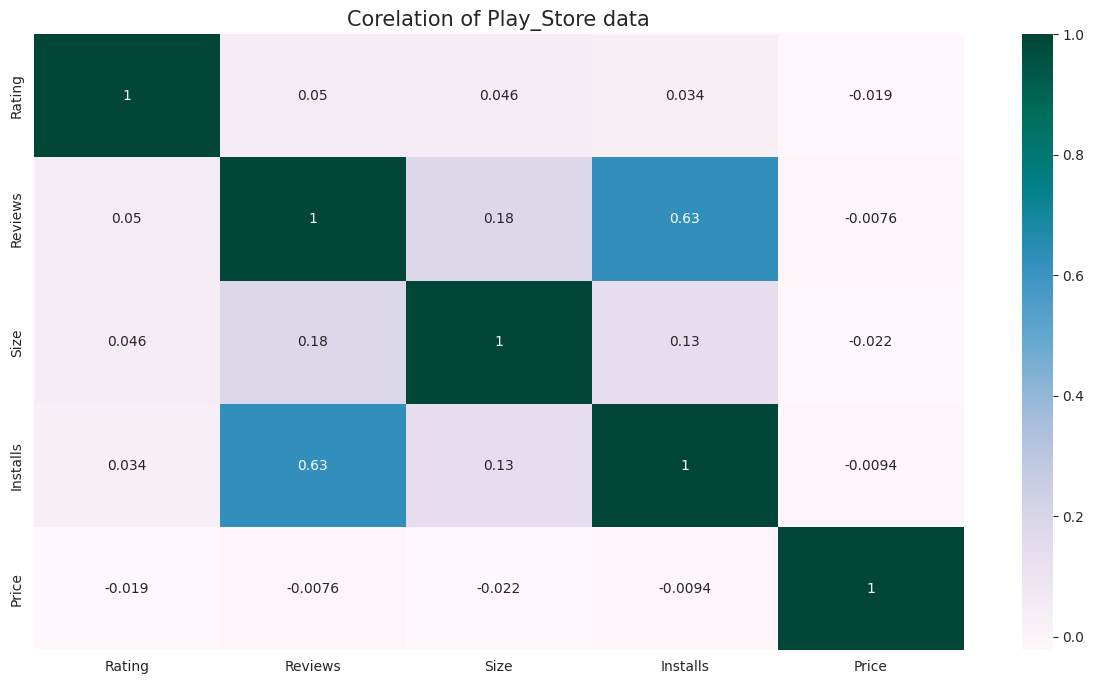

In [507]:
# Heat map for play_store
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot= True,cmap='PuBuGn')
plt.title('Corelation of Play_Store data', size=15)
plt.show()

# Analysis with User Reviews and treat with the data


In [508]:
review = pd.read_csv('/content/User Reviews.csv')
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [509]:
# information of the data
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [510]:
# description of the data
review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [511]:
# print the cloumn of the dataset
review.columns


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### understand the features of the data in the dataset
1. **App:** This column represents the name of the mobile application for which the review was written. Each review is associated with a specific app.

2. **Translated_Review:**  This column contains the text of the review written by a user. It may be the original review or a translated version if the review was originally written in a different language.

3. **'Sentiment':** This column indicates the sentiment or emotional tone expressed in the review. It typically classifies the sentiment into categories such as positive, negative, or neutral. This classification is based on the content of the review text.

4. **'Sentiment_Polarity':** This column quantifies the sentiment polarity of the review, indicating the degree of positivity or negativity in the review. It often ranges from -1 to 1, where negative values represent negative sentiment, positive values represent positive sentiment, and zero represents a neutral sentiment.

5. **'Sentiment_Subjectivity':** This column measures the subjectivity of the review, indicating how opinionated or subjective the review is. It typically ranges from 0 to 1, where 0 represents an objective or factual review, and 1 represents a highly subjective or opinionated review.

These columns provide valuable information for analyzing and understanding user reviews on Google Play, including the sentiment expressed, the overall polarity of opinions, and the subjectivity of the reviews.





In [512]:
# information of the data into the tabular form
def review_info():
  val=pd.DataFrame(index=review.columns)
  val["datatype"]=review.dtypes
  val["not_null_values"]=review.count()
  val["null_value"]=review.isnull().sum()
  val["%_of_the_null_value"]=review.isnull().mean().round(4)*100
  val["unique_count"]=review.nunique()
  return val
review_info()

,datatype,not_null_values,null_value,%_of_the_null_value,unique_count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


### know your data and analyse

In [513]:
# find the total number of null values and try to handle these null values.
review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [514]:
# as we can see there are large number of null values so that we'll find some pattern and analyse them for handling the null values

review[review['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [515]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
review[review['Translated_Review'].isnull() & review['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


if we'll see the above pattern we can find there is the applictaion which doesn't contains any data into the null values(NaN)
* **Note we can drop the NaN valued from the datset**

In [516]:
# dropping the null values from the data
review = review.dropna()

In [517]:
# check the information of the data
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [518]:
# describes the updated dataframes
review.describe() 

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [519]:
# find the correlation of the dataset
review.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


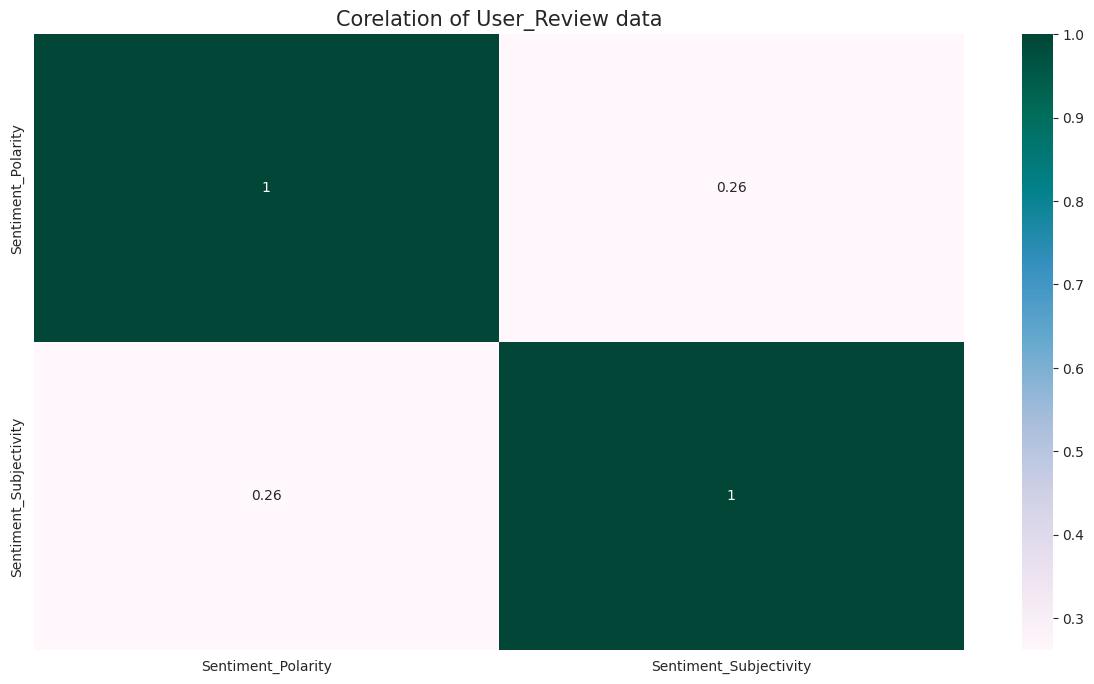

In [520]:
# Heat map for play_store
plt.figure(figsize = (15,8))
sns.heatmap(review.corr(), annot= True,cmap='PuBuGn')
plt.title('Corelation of User_Review data', size=15)
plt.show()

# Merged both the dataset for further analysis

In [521]:
# applied inner merged for find the intersection of the data
# It'll take the data as which is common in both the dataset based on the app
df = pd.merge(data, review, on='App', how = "inner") 

In [522]:
# show the head of the dataframe
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [523]:
# find and create the tabular format of data of the cloumn

def df_info():
  val = pd.DataFrame(index=df.columns)
  val['data_type'] = df.dtypes
  val['NaN values'] = df.isnull().sum()
  val['Percentage of NaN values'] =df.isnull().mean()
  val['unique_count'] = df.nunique() 
  return val
df_info()

,data_type,NaN values,Percentage of NaN values,unique_count
App,object,0,0.000000,816
Category,object,0,0.000000,33
Rating,float64,0,0.000000,22
Reviews,int64,0,0.000000,807
Size,float64,11860,0.330095,166
Installs,int64,0,0.000000,12
Type,object,0,0.000000,2
Price,float64,0,0.000000,9
Content Rating,object,0,0.000000,5
Genres,object,0,0.000000,67


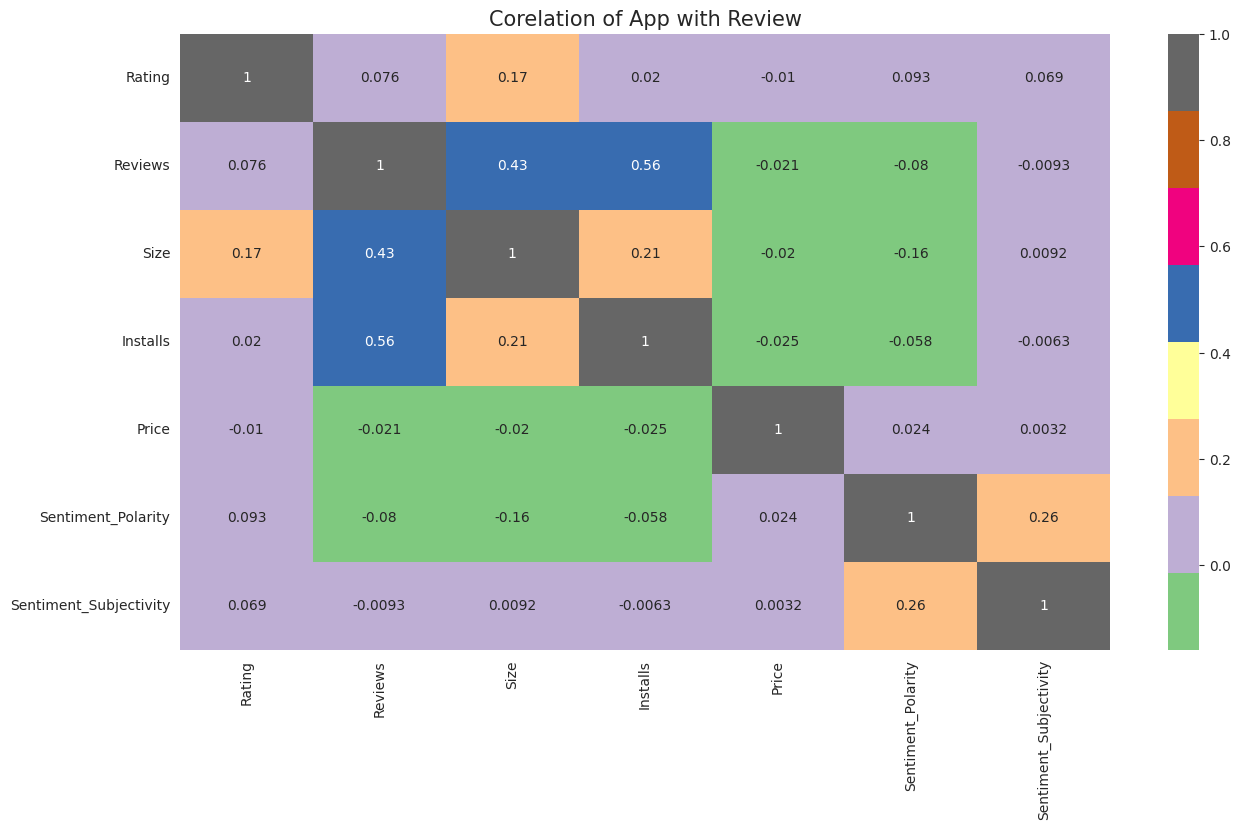

In [524]:
# find and correlation of the Dataframe after merged into the dataset
# Heat map for play_store
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot= True,cmap='Accent')
plt.title('Corelation of App with Review', size=15)
plt.show()

In [525]:
# find the null values of the merged dataframe
df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                      11860
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review             0
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     35929 non-null  object        
 1   Category                35929 non-null  object        
 2   Rating                  35929 non-null  float64       
 3   Reviews                 35929 non-null  int64         
 4   Size                    24069 non-null  float64       
 5   Installs                35929 non-null  int64         
 6   Type                    35929 non-null  object        
 7   Price                   35929 non-null  float64       
 8   Content Rating          35929 non-null  object        
 9   Genres                  35929 non-null  object        
 10  Last Updated            35929 non-null  datetime64[ns]
 11  Current Ver             35929 non-null  object        
 12  Android Ver             35929 non-null  object

In [527]:
df = df.dropna(subset=['Sentiment', 'Translated_Review'])
df.shape

(35929, 17)

In [528]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


# Analyze the Playstore data with data Visualization

### Find the number of ratio of the free or paid application

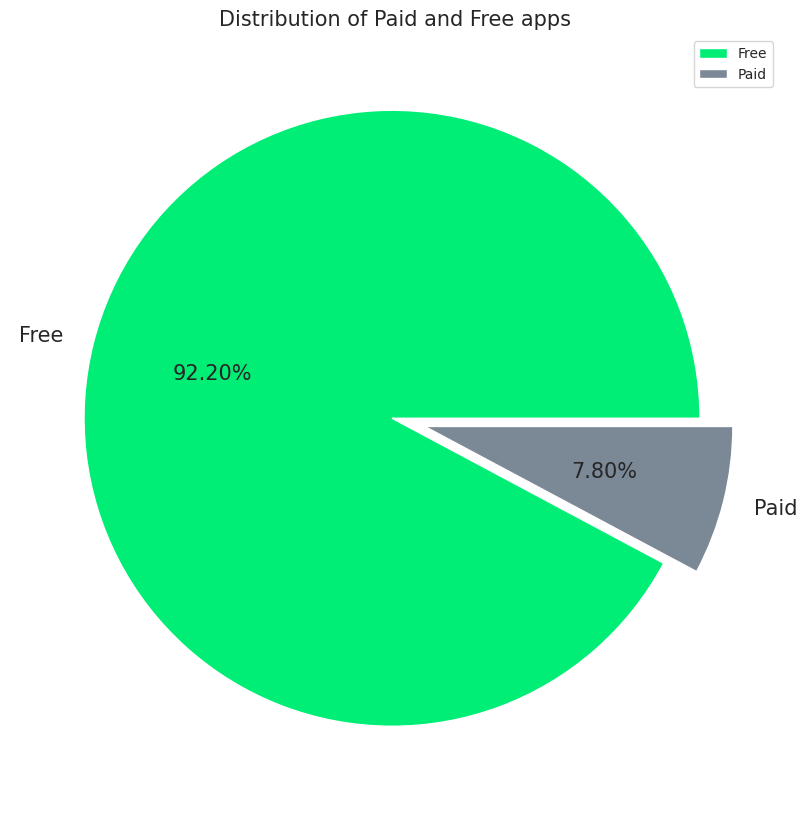

In [529]:
value = data['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(value, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

### find the content rating of the overall application into the Play Store

In [530]:
# Uniqu value of the content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+'], dtype=object)

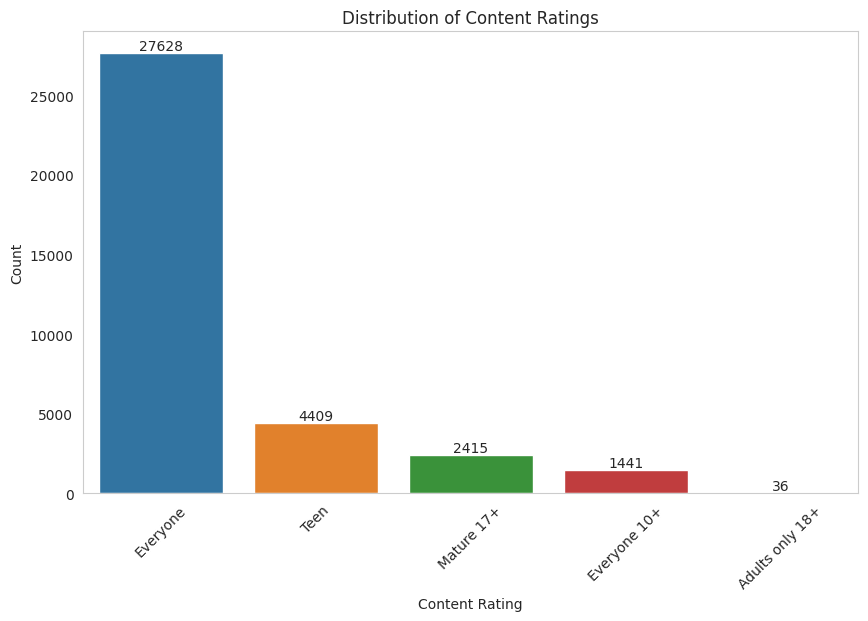

In [531]:

# Get the unique values of 'Content Rating'
content_rating_unique = df['Content Rating'].unique()

# Count the occurrences of each unique value
content_rating_counts = df['Content Rating'].value_counts()

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_counts.index, y=content_rating_counts.values)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Display the count on top of each bar
for i, count in enumerate(content_rating_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')
plt.show()


### Which categories from the audience should the app be based on?

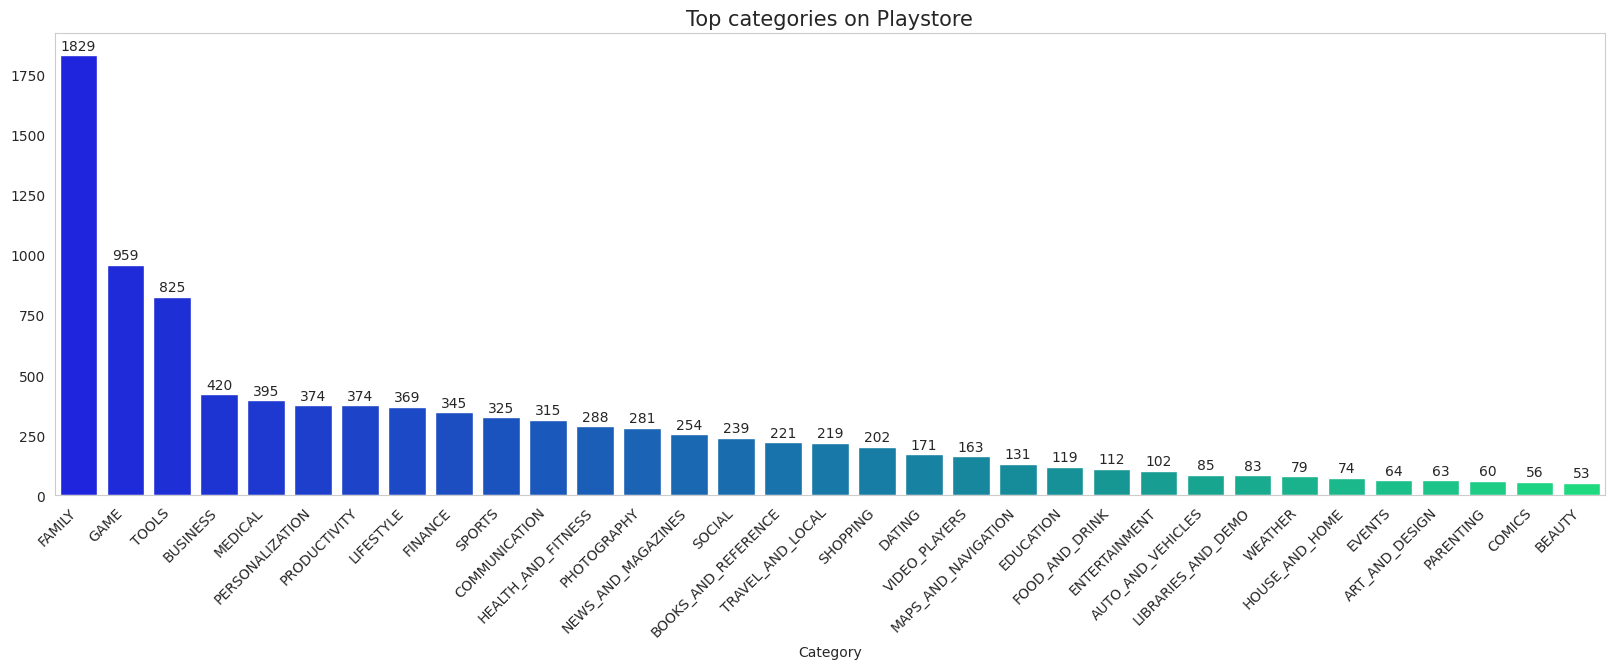

In [532]:
# Group the data by 'Category' and count the number of apps
category_counts = data.groupby('Category')['App'].count().sort_values(ascending=False)

# Plot the barplot
plt.figure(figsize=(20, 6))
graph = sns.barplot(x=category_counts.index, y=category_counts.values, palette = "winter")
graph.set_title("Top categories on Playstore", fontsize = 15)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);


# number of apps belongs to the categories 
for i, count in enumerate(category_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

### Which category has the most no. of installations?

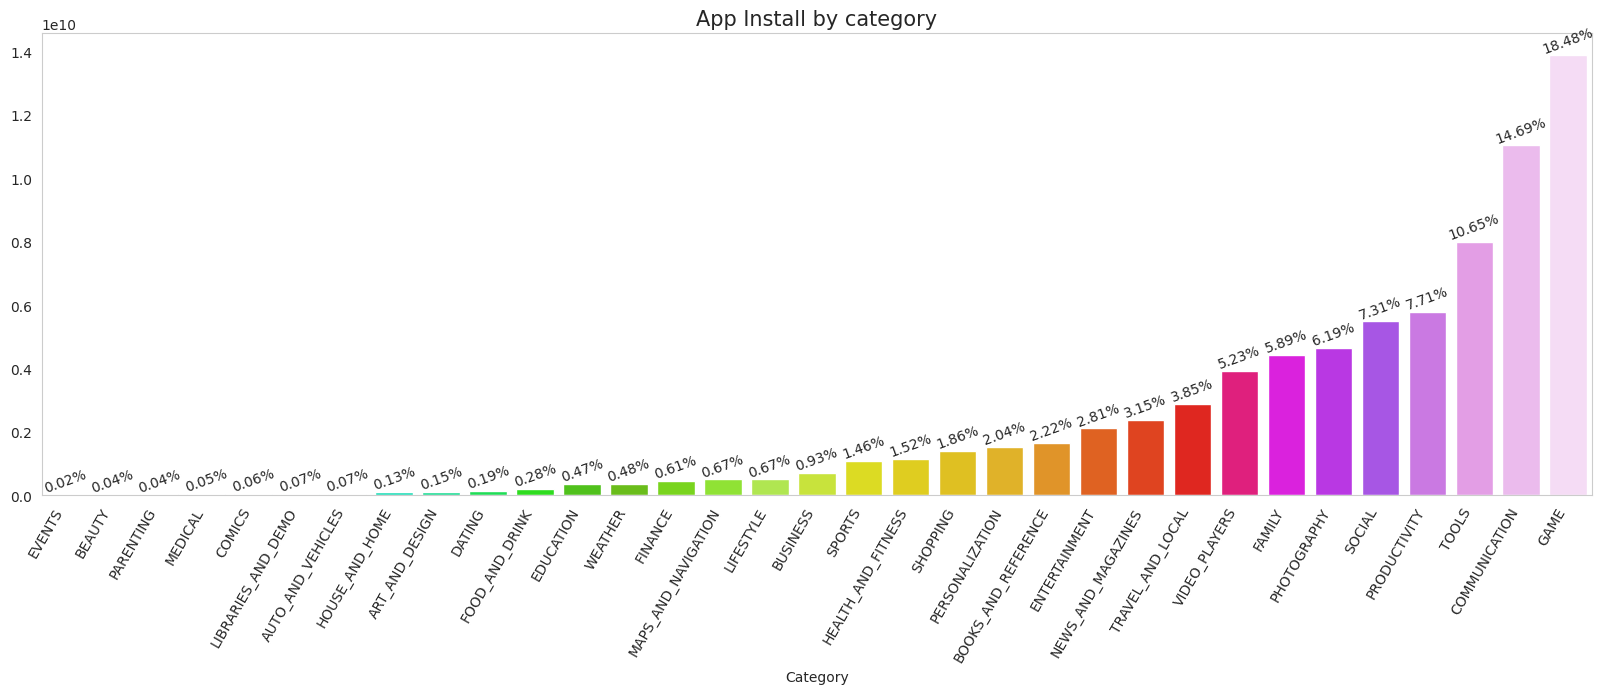

In [533]:
# Group the data by 'Category' and count the number of apps
category_counts = data.groupby('Category')['Installs'].sum().sort_values(ascending=True)

# Calculate the percentage of the data for each category
total_installs_sum = category_counts.sum()
category_percentage = (category_counts / total_installs_sum) * 100

# Plot the barplot
plt.figure(figsize=(20, 6))
graph = sns.barplot(x=category_counts.index, y=category_counts.values, palette = "gist_ncar")
graph.set_title("App Install by category", fontsize = 15)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 60, horizontalalignment='right',);

# Display the percentage values on top of each bar
for i, percentage in enumerate(category_percentage):
    plt.text(i, category_counts[i] + 10000, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=10, rotation= 20)

plt.show()

### Overall rating of the apps in playstore


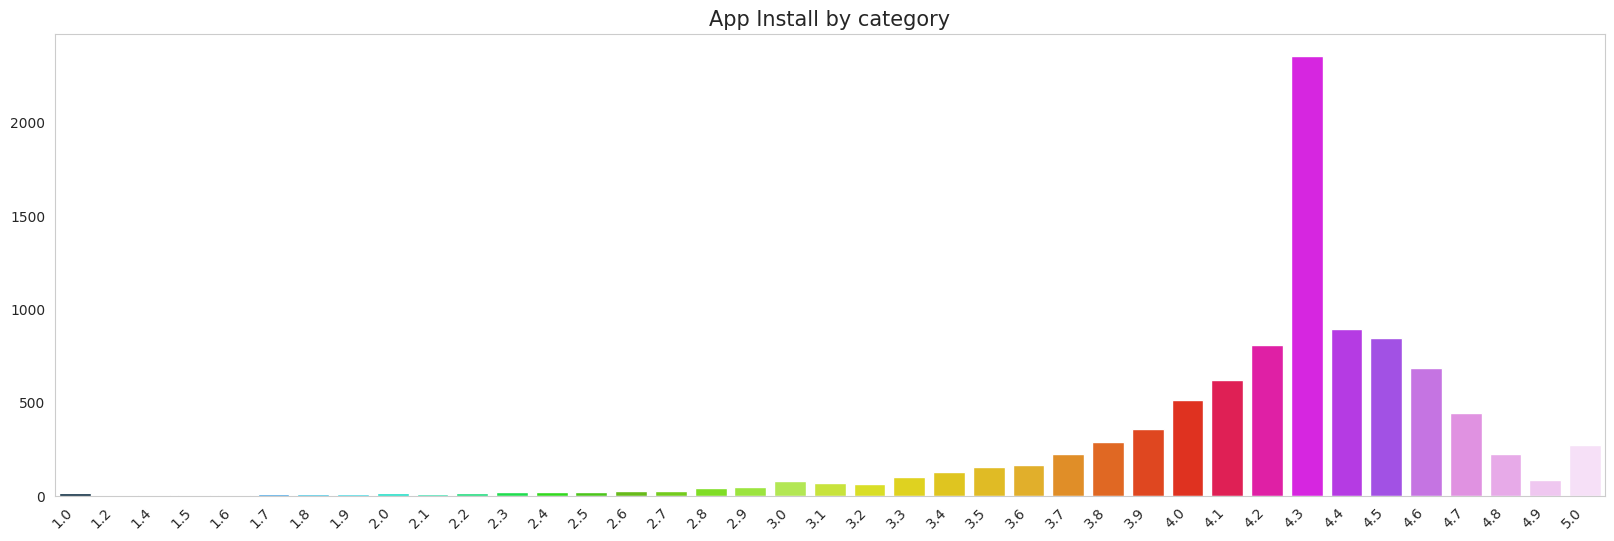

In [534]:

rating = data['Rating'].value_counts()
plt.figure(figsize=(20, 6))


graph = sns.barplot(x=rating.index, y=rating.values, palette = "gist_ncar")
graph.set_title("App Install by category", fontsize = 15)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',)

plt.show()

In [535]:
# Let's distribute the app by the categories of Top, and Below rated
# Defining a function grouped_rating to group the ratings as mentioned above
def Rating_app(val):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if val>=4:
    return 'Excellent'
  elif val>3 and val<4:
    return 'Good'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Bad'


In [536]:
# Applying grouped_rating function
data['Rating_group']=data['Rating'].apply(lambda x: Rating_app(x))

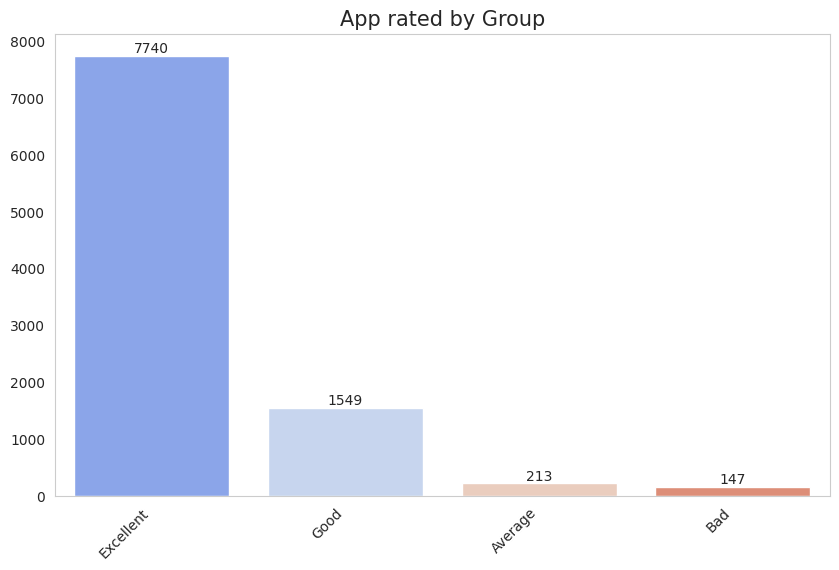

In [537]:
# Average app ratings 
rating = data['Rating_group'].value_counts()
plt.figure(figsize=(10, 6))


graph = sns.barplot(x=rating.index, y=rating.values, palette = "coolwarm")
graph.set_title("App rated by Group", fontsize = 15)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',)

# number of apps belongs to the categories 
for i, count in enumerate(rating.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')
   
plt.show()

### find the top 10 installed application by any specefic category

In [538]:
def topApps(str):
    str = str.upper() # as features is in capitilize form
    topApp = data[data['Category'] == str] 
    top_10_apps = topApp.sort_values(by='Installs', ascending=False).head()
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Most installed Application',size = 14)  
    graph = sns.barplot(x = top_10_apps.App, y = top_10_apps.Installs, palette= "ocean")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')




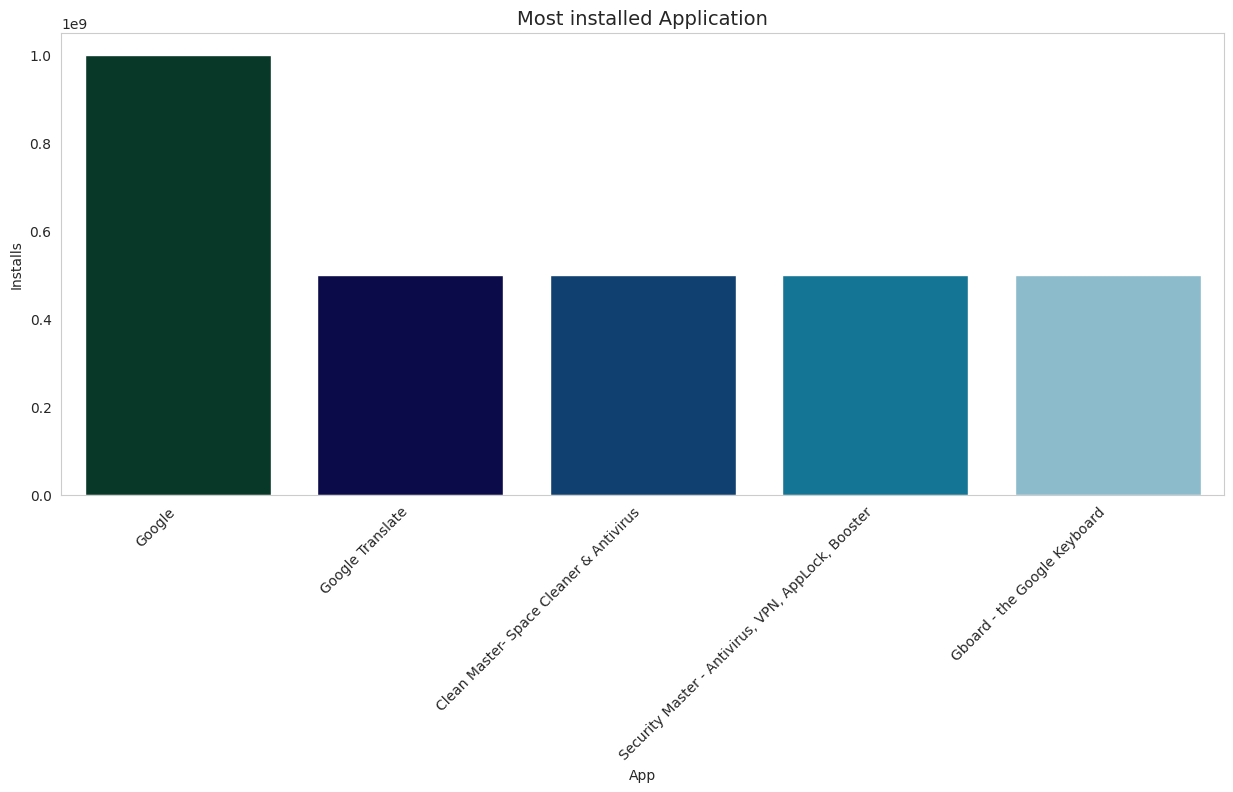

In [539]:
topApps('TOOlS')

### Top free Application 


In [540]:
 # Creating a df for only free apps
 
 free_df = data[data['Type'] == 'Free']
 free_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Excellent
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Good
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Excellent
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Excellent
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Excellent


In [541]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Good
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Excellent
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Excellent
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Excellent
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Excellent


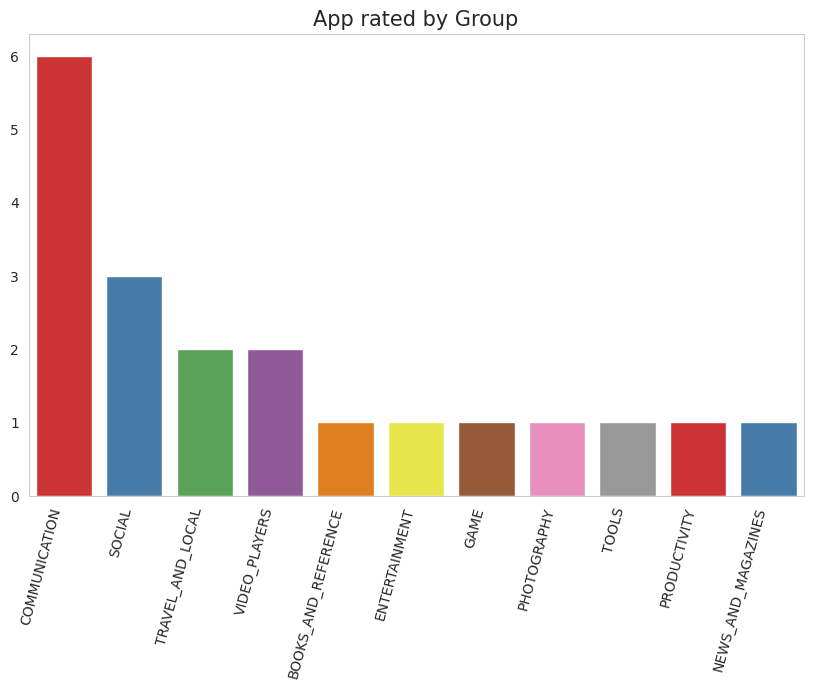

In [542]:
# Average app category_countss 
category_counts = top_free_df['Category'].value_counts()
plt.figure(figsize=(10, 6))

graph = sns.barplot(x=category_counts.index, y=category_counts.values, palette = "Set1")
graph.set_title("App rated by Group", fontsize = 15)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 75, horizontalalignment='right',)  
plt.show()

### Top paid Application


In [543]:
 paid_app = data[data['Type'] != 'Free']
 paid_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Excellent
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Excellent
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Excellent
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Excellent
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average


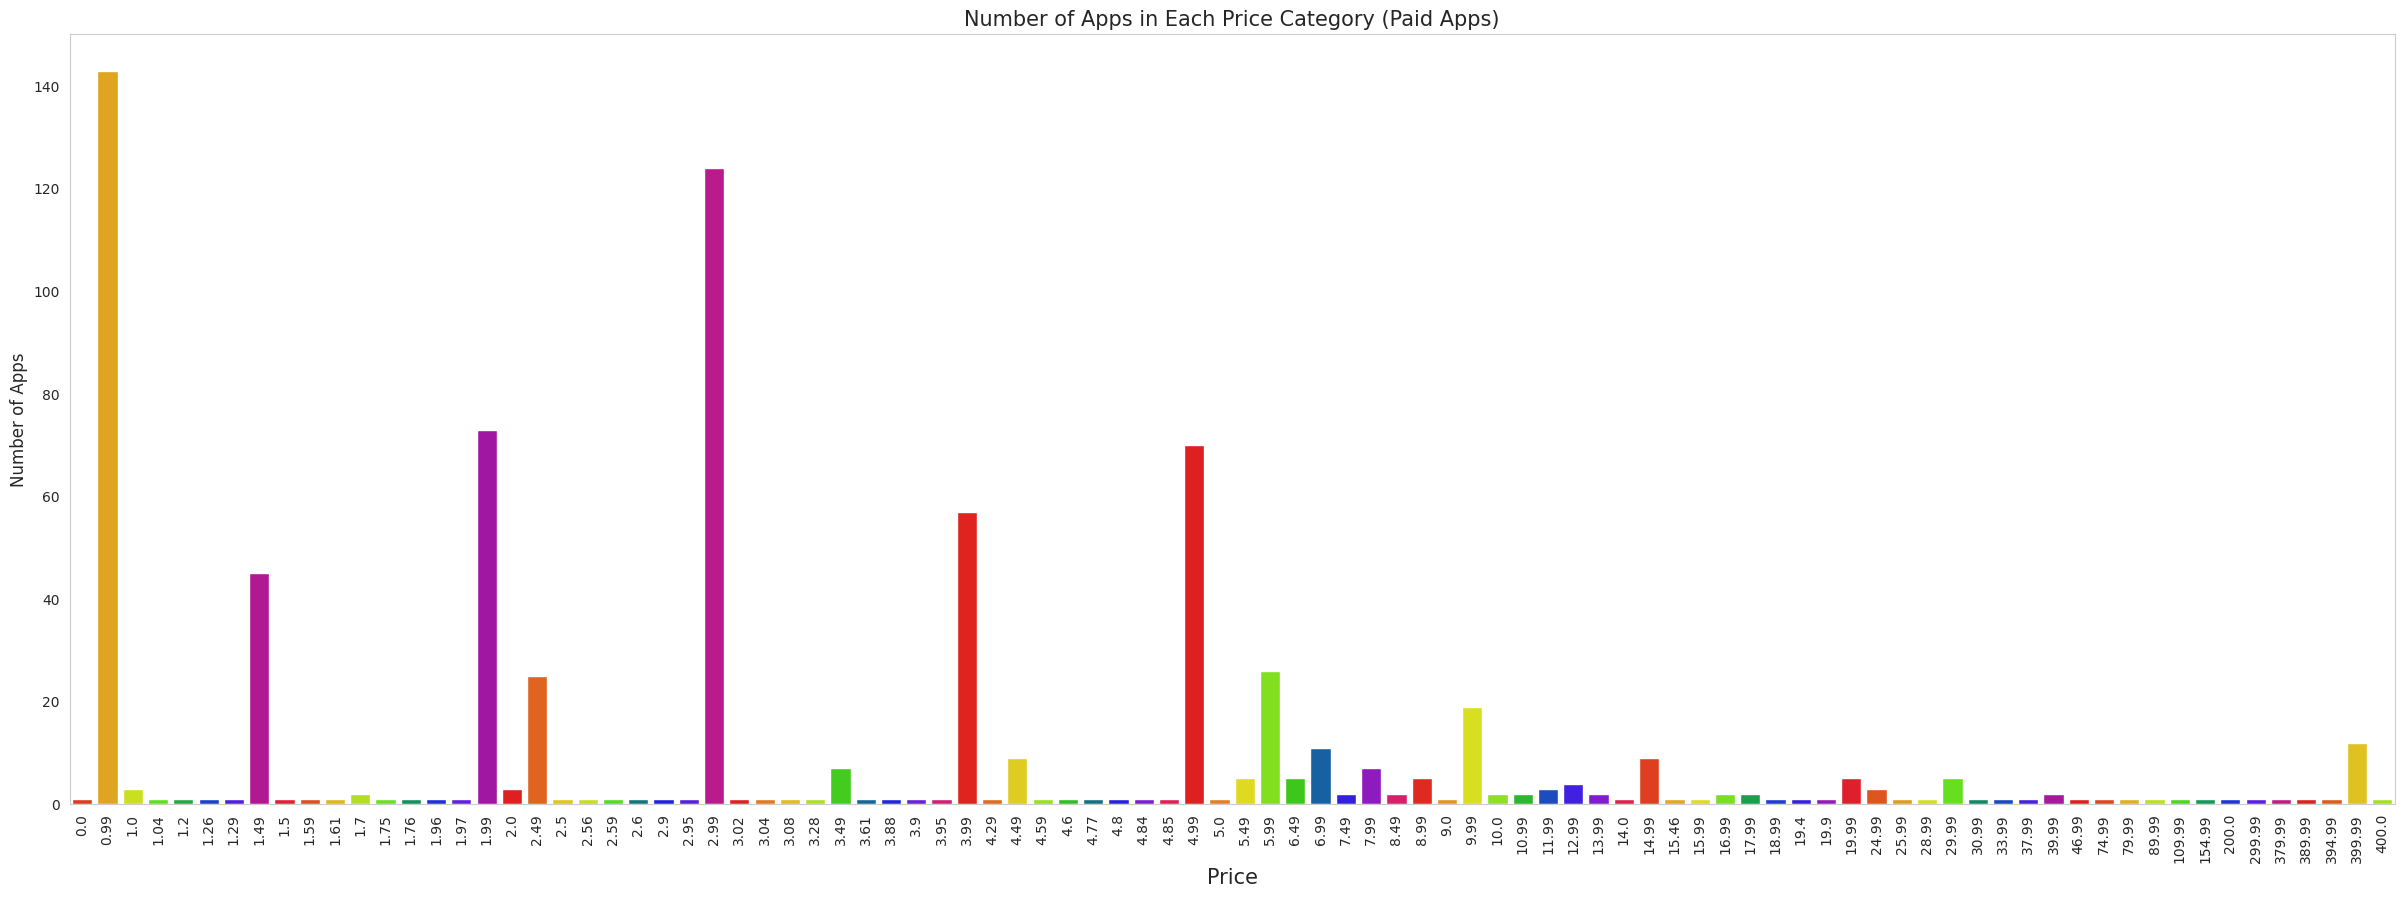

In [544]:

# Group the data by 'Price' and count the number of apps
price_counts = paid_app.groupby('Price')['App'].count().sort_values()

# Plot the barplot
plt.figure(figsize=(30, 10))
graph = sns.barplot(x=price_counts.index, y=price_counts.values, palette='prism')
graph.set_xlabel('Price', size=15)
graph.set_ylabel('Number of Apps', size=12)
graph.set_title('Number of Apps in Each Price Category (Paid Apps)', size=15)
plt.xticks(rotation=90)

# Show the plot
plt.show()


### Top Revenue generated Application


In [545]:
# Creatng a new column 'Revenue' in paid_df
paid_app['Revenue'] = paid_app['Installs']*paid_app['Price']
paid_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Excellent,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Excellent,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Excellent,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Excellent,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average,6990.0


In [546]:
# Top app in the paid category

paid_app[paid_app['Revenue'] == paid_app['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Excellent,69900000.0


In [547]:
# Top paid apps in the play store
top_paid_app=paid_app.nlargest(10, 'Revenue', keep='first')
top_paid_app['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

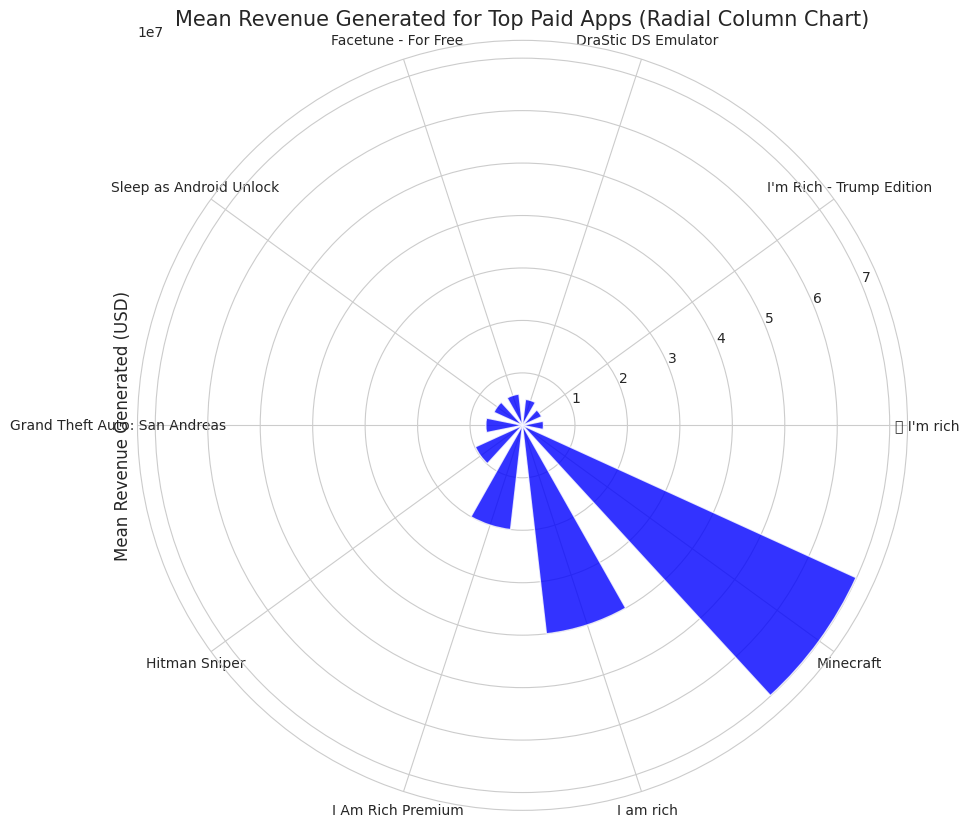

In [548]:
# Create an array of angles for the radial chart
angles = np.linspace(0, 2 * np.pi, len(mean_revenue), endpoint=False).tolist()

# Plot the radial column chart
plt.figure(figsize=(15, 10))
ax = plt.subplot(111, polar=True)
ax.bar(angles, mean_revenue.values, width=0.4, color='blue', alpha=0.8)

# Set the labels for each app along the radial axis
ax.set_xticks(angles)
ax.set_xticklabels(mean_revenue.index, fontsize=10)

# Set the radial axis label
ax.set_ylabel('Mean Revenue Generated (USD)', fontsize=12)

# Set the title
plt.title('Mean Revenue Generated for Top Paid Apps (Radial Column Chart)', fontsize=15)

# Display the plot
plt.show()


### distribute the applications by their size review and revenue


In [549]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

In [550]:
# apply the function on the dataset to define the size of the application
data['size_group']=data['Size'].apply(lambda x : size_apps(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,size_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Excellent,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Good,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Excellent,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Excellent,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Excellent,1-10


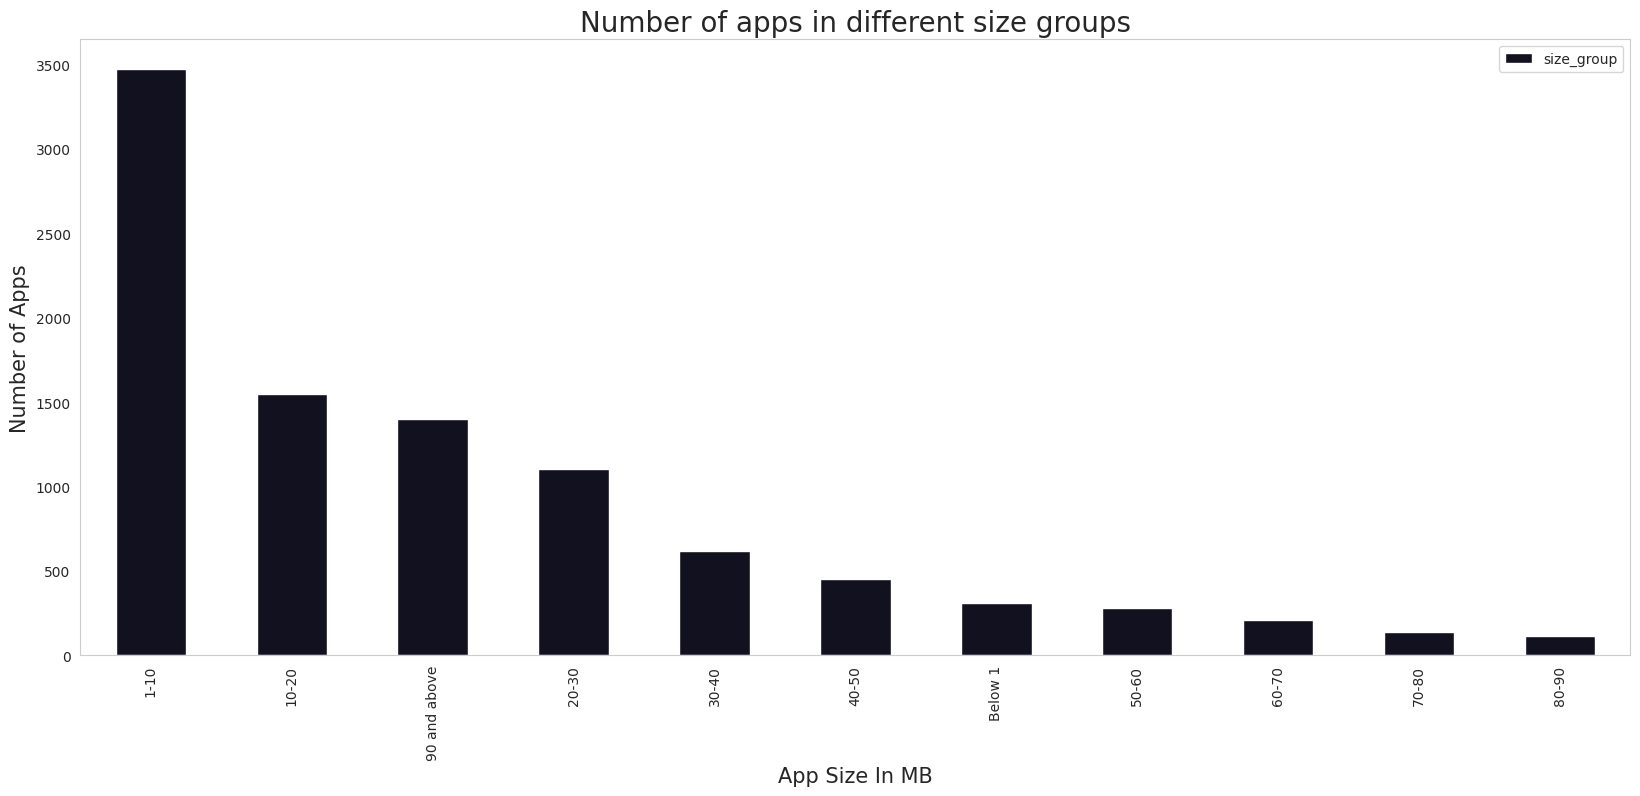

In [551]:
# no of apps belonging to each size group
data['size_group'].value_counts().plot.bar(figsize=(20,8),color='#121120')
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('Number of Apps', size=15)
plt.xlabel('App Size In MB', size=15)
plt.legend()

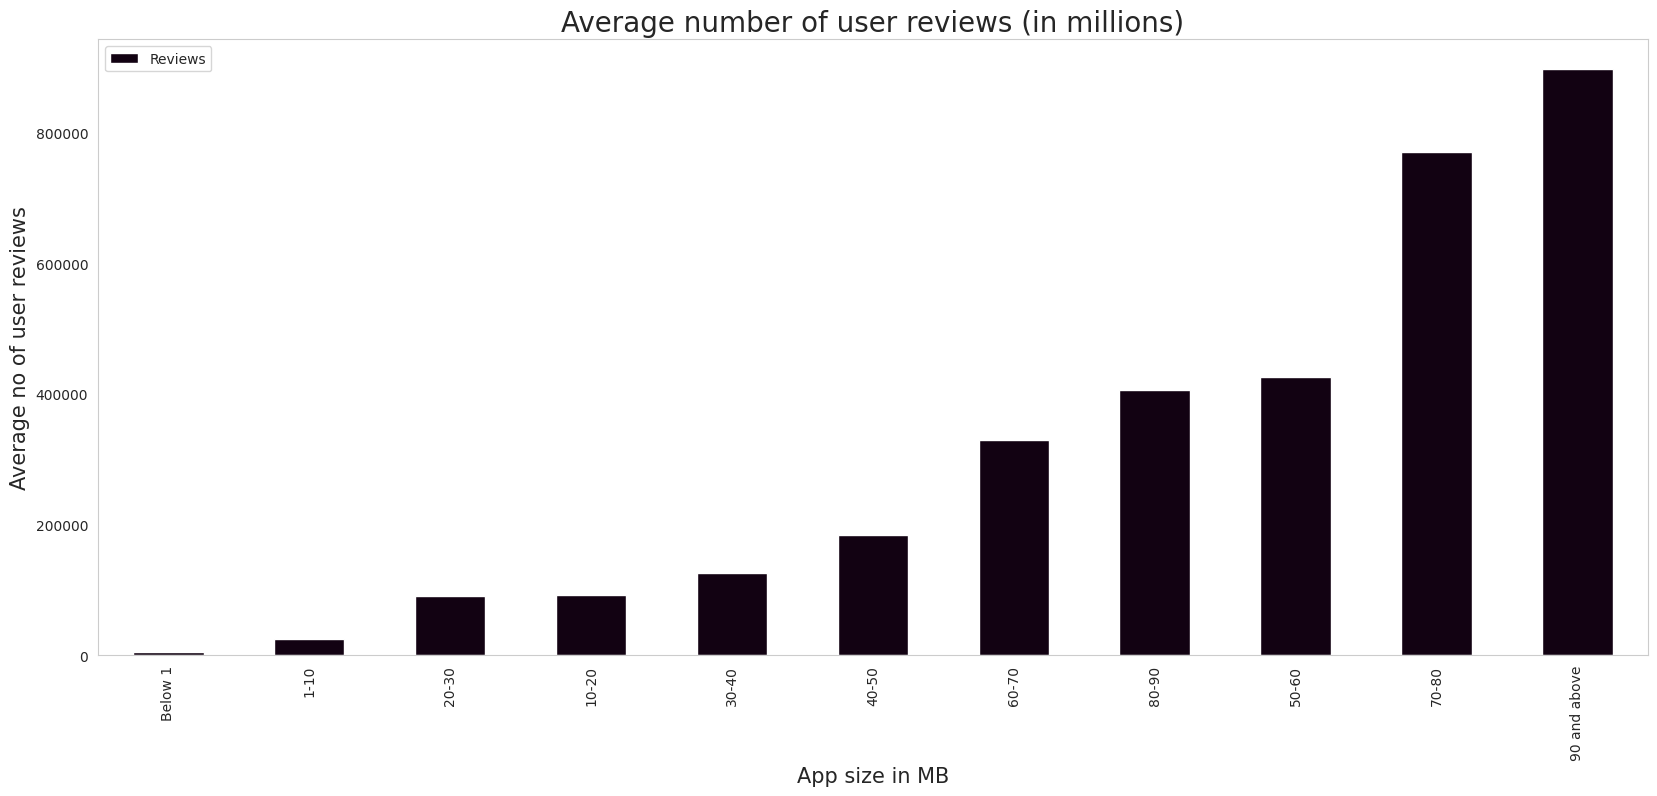

In [552]:
# average no of user reviews in each size group
data.groupby('size_group')['Reviews'].mean().sort_values().plot.bar(figsize=(20,8), color = '#120212')
plt.title("Average number of user reviews (in millions)", size=20)
plt.ylabel('Average no of user reviews', size=15)
plt.xlabel('App size in MB', size=15)
plt.legend()
plt.show()

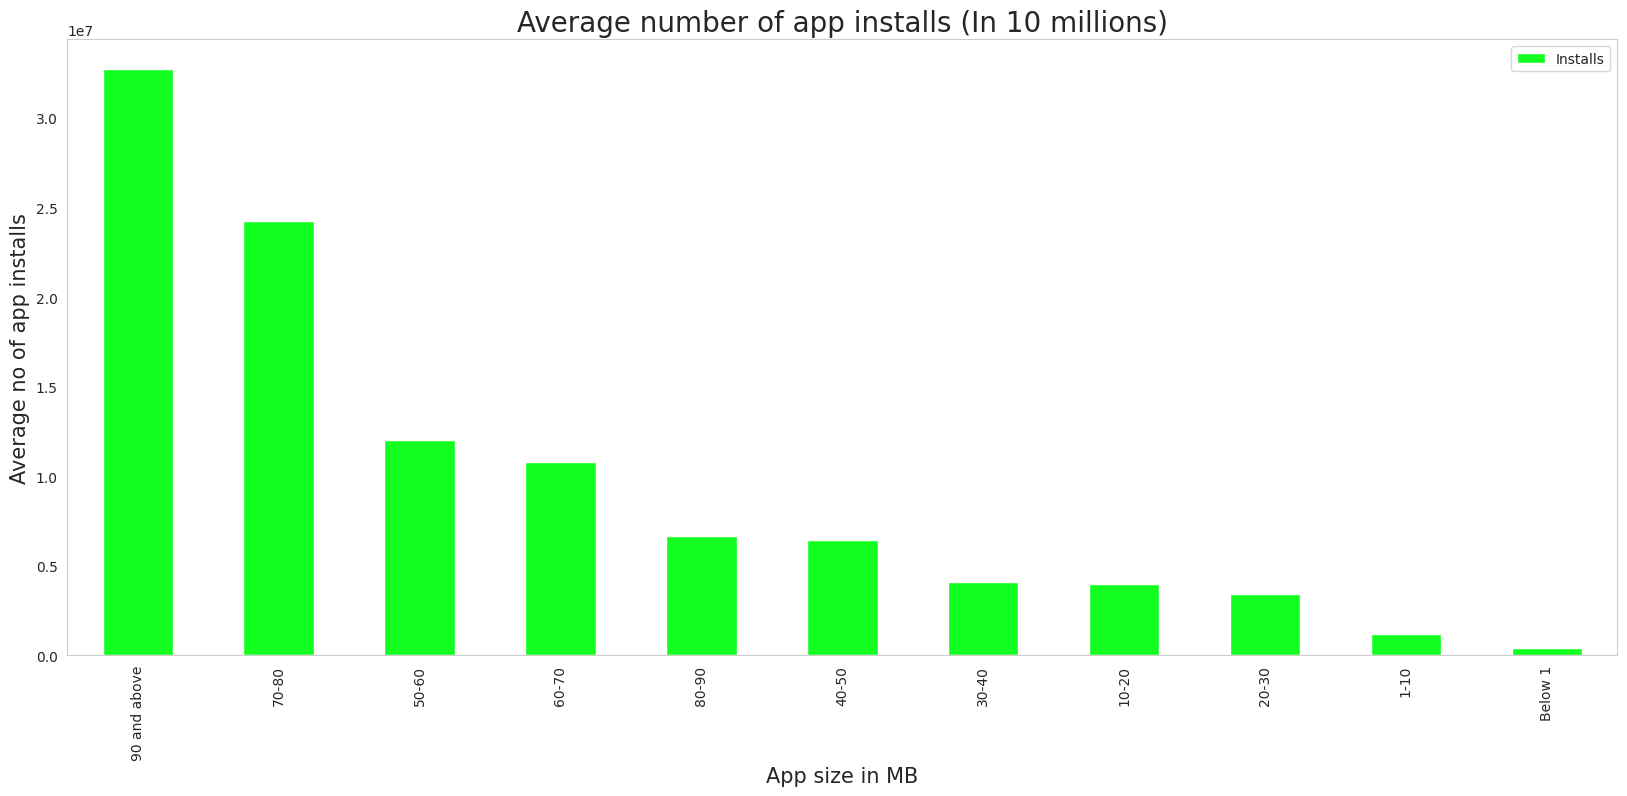

In [553]:
# average number of app installs in each category

data.groupby('size_group')['Installs'].mean().sort_values(ascending= False).plot.bar(figsize=(20,8),color='#12ff1f')
plt.title("Average number of app installs (In 10 millions)", size=20)
plt.xlabel('App size in MB', size=15)
plt.ylabel('Average no of app installs',  size=15)
plt.legend()
plt.show()

### Andriod version of the Application 

In [554]:
# convert the android version into the specific version wrt categories

data['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
data['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
data['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
data['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
data['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
data['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
data['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
data['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
data['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
data['Android Ver'].fillna('1.0', inplace=True)

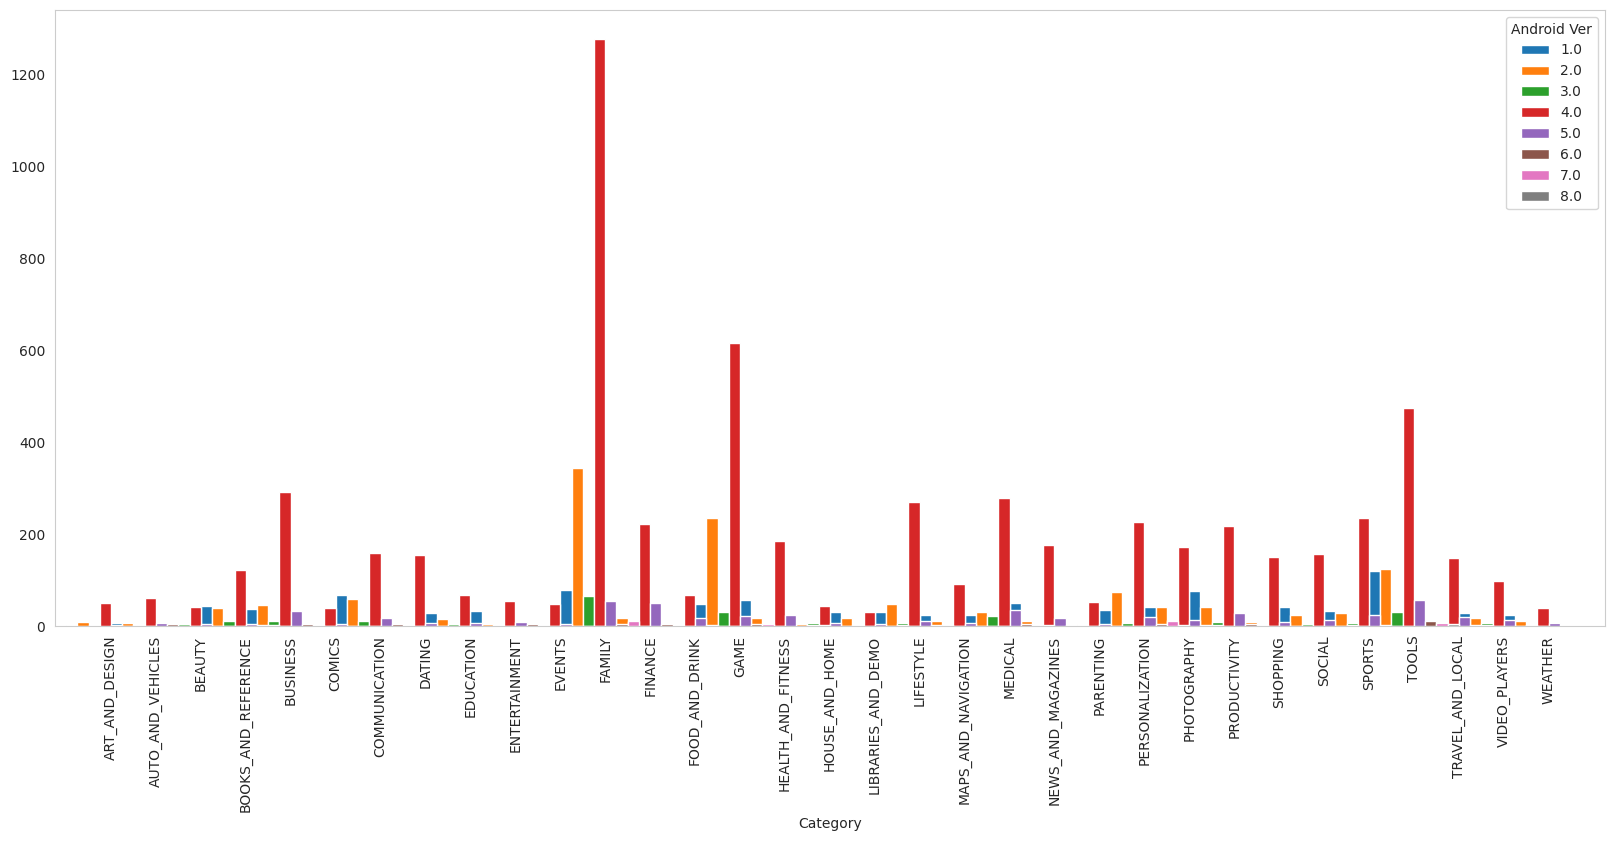

In [555]:
Type_cat = data.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(20,8), width=2)
plt.xticks()
plt.show()

# Analyze the review data for sentimental analysis of the dataset

In [556]:
# find the number of columns in dataset
review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [557]:
review['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

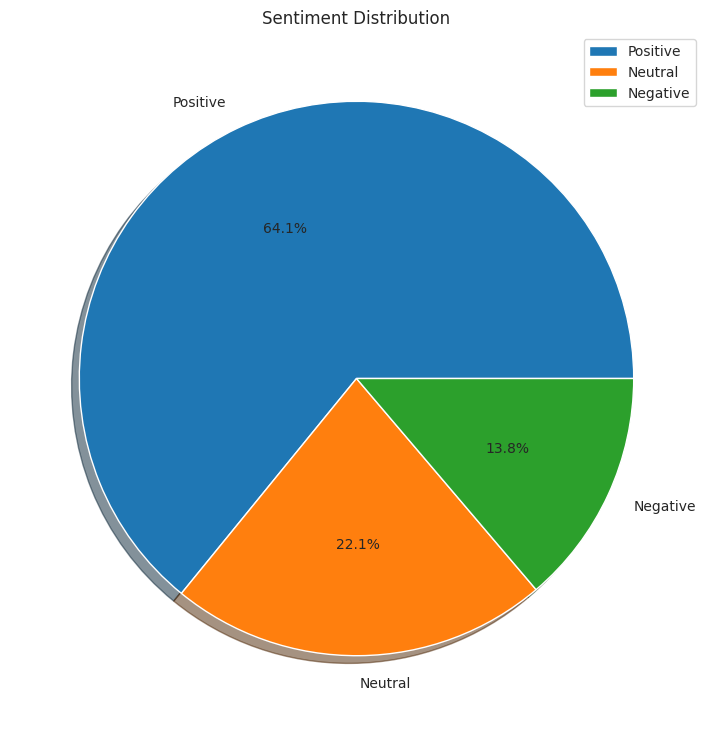

In [558]:
# Assuming you have the unique values stored in a variable
sentiments = review['Sentiment'].unique()

# Count the occurrences of each sentiment
sentiment_counts = review['Sentiment'].value_counts()
 
plt.figure(figsize=(10,9))
# Create a pie chart
plt.pie(sentiment_counts, labels=sentiments, autopct='%1.1f%%',shadow= True)
plt.title('Sentiment Distribution')
plt.legend()
# Display the chart
plt.show()


### find the apps which is having the highest number of positive,negative and nuterral rating rating

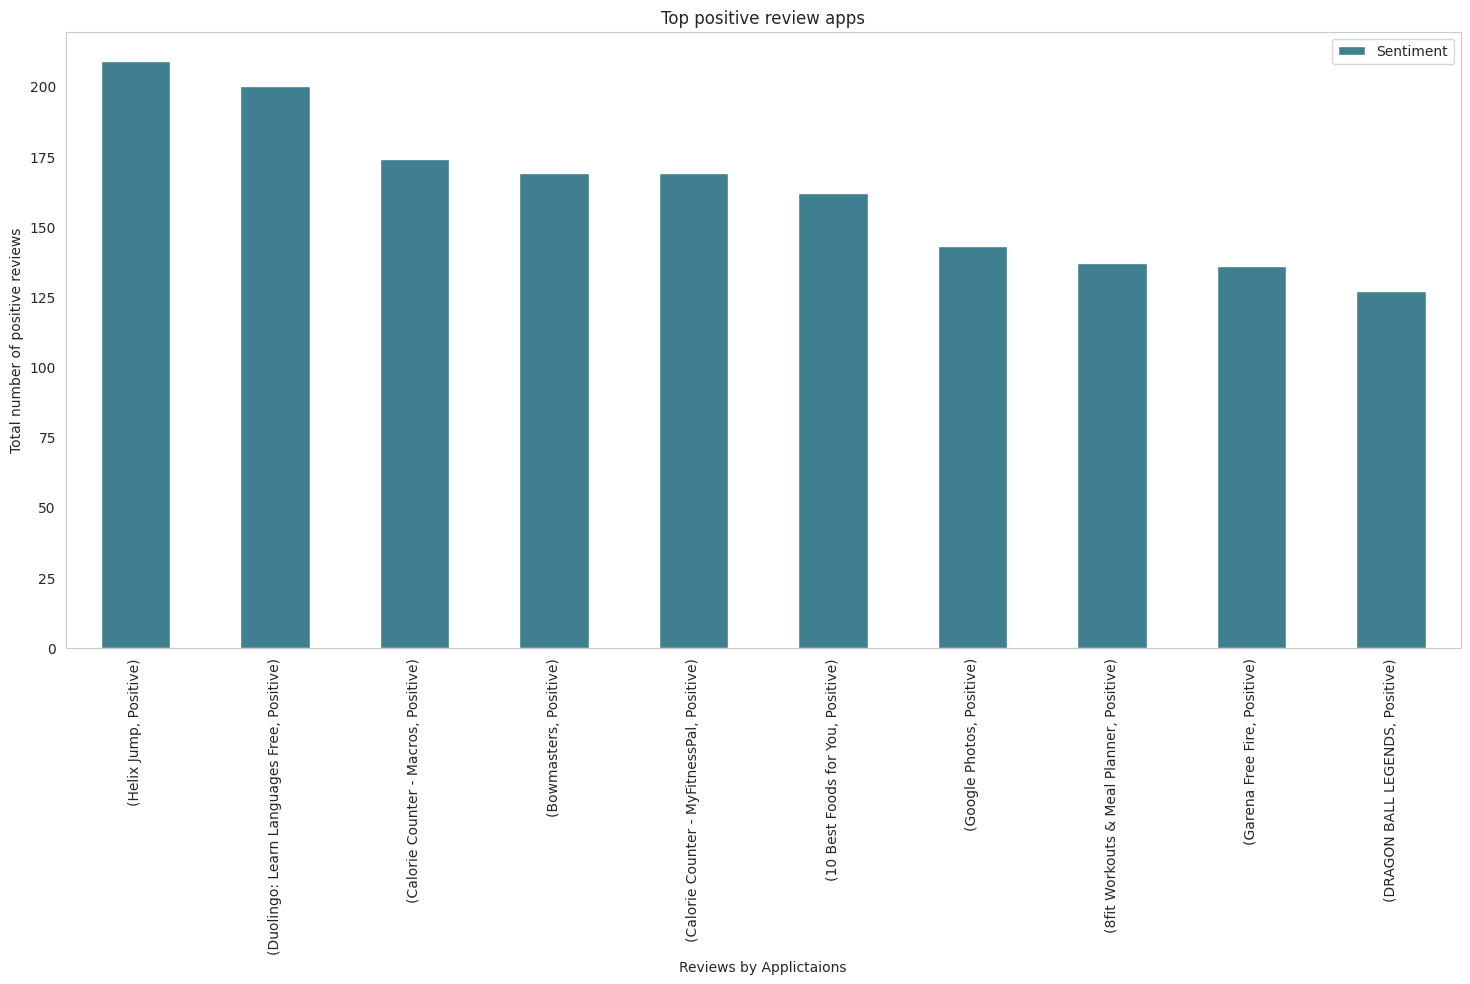

In [559]:
# apps with highest number of poritive rating
# positive reviews
positive_review=review[review['Sentiment']=='Positive']

positive_review.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(18,8),color='#3f7f8f')
plt.title("Top positive review apps")
plt.ylabel('Total number of positive reviews')
plt.xlabel('Reviews by Applictaions')
plt.legend()

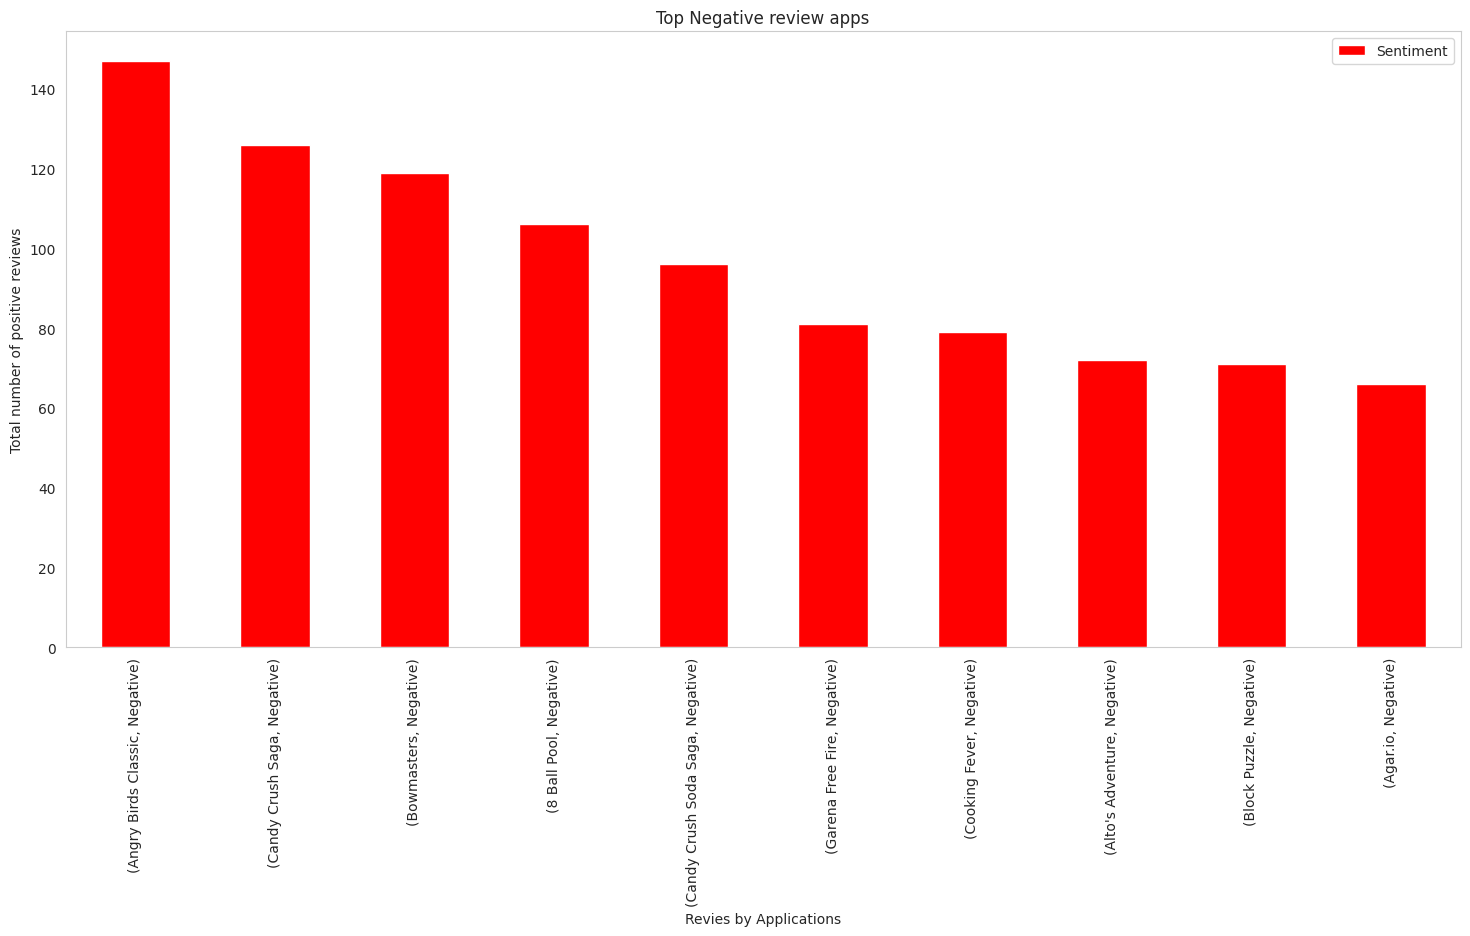

In [560]:
# Negatives reviews
positive_review=review[review['Sentiment']=='Negative']

positive_review.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(18,8),color='red')
plt.title("Top Negative review apps")
plt.ylabel('Total number of positive reviews')
plt.xlabel('Revies by Applications')
plt.legend()
plt.show()

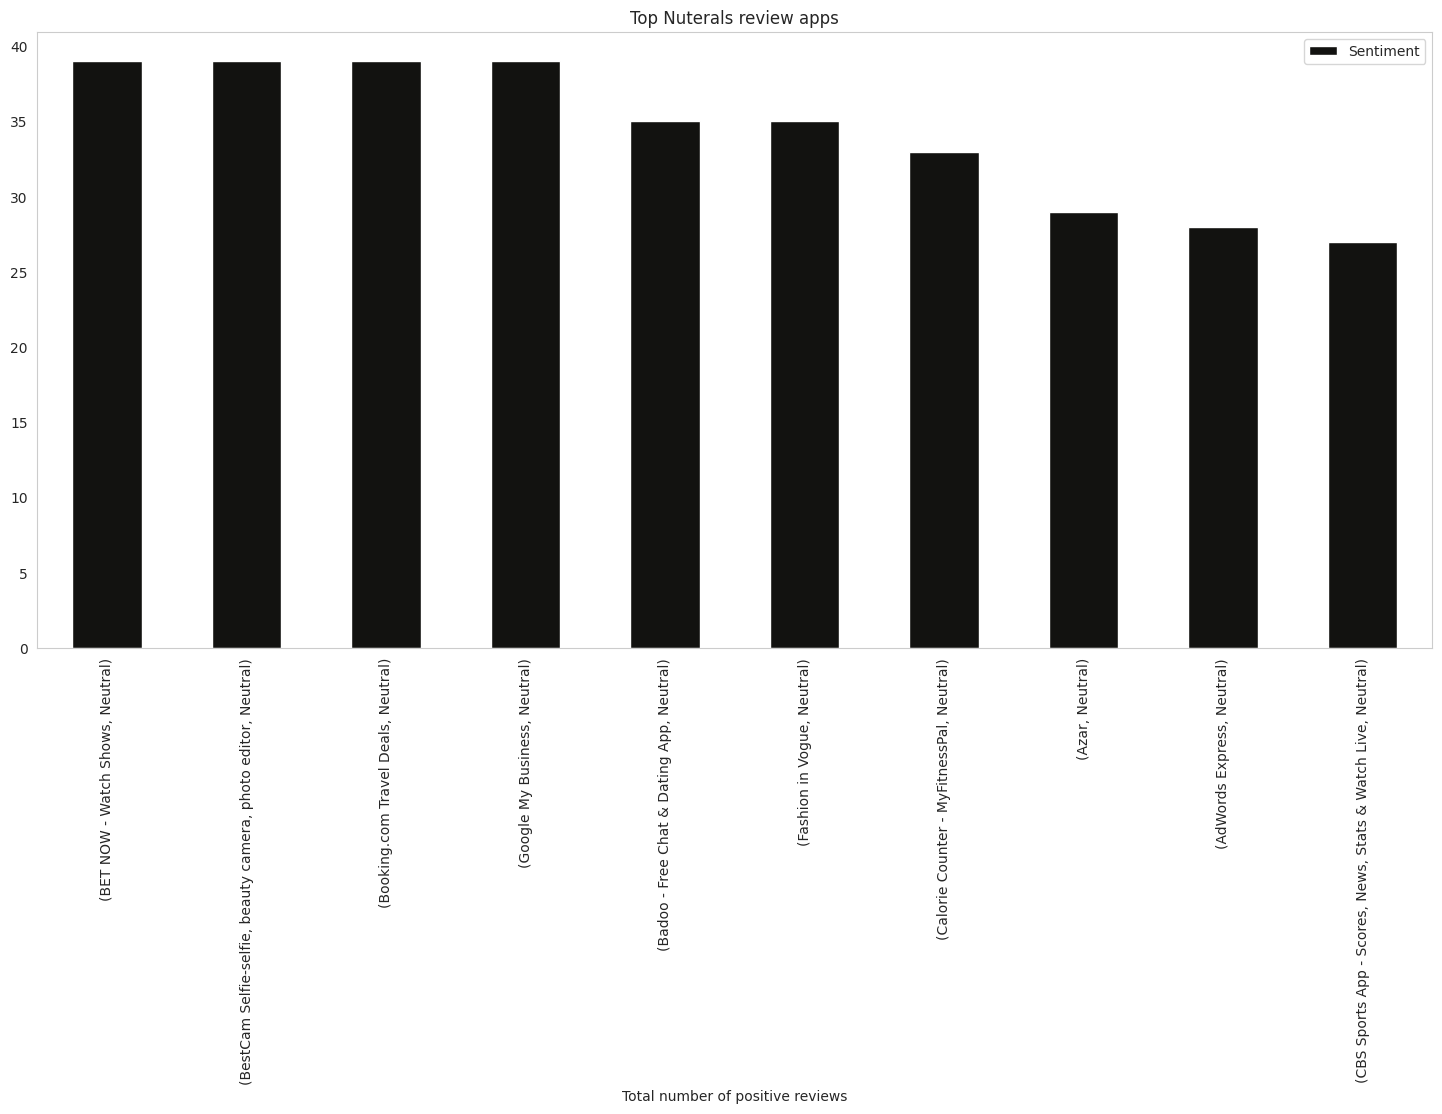

In [561]:
# positive reviews
positive_review=review[review['Sentiment']=='Neutral']

positive_review.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(18,8),color='#121210')
plt.title("Top Nuterals review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

### does updates effect on the application

In [562]:
print(data['Last Updated'].head())
#fetch update year from date
data["Update year"] = data["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


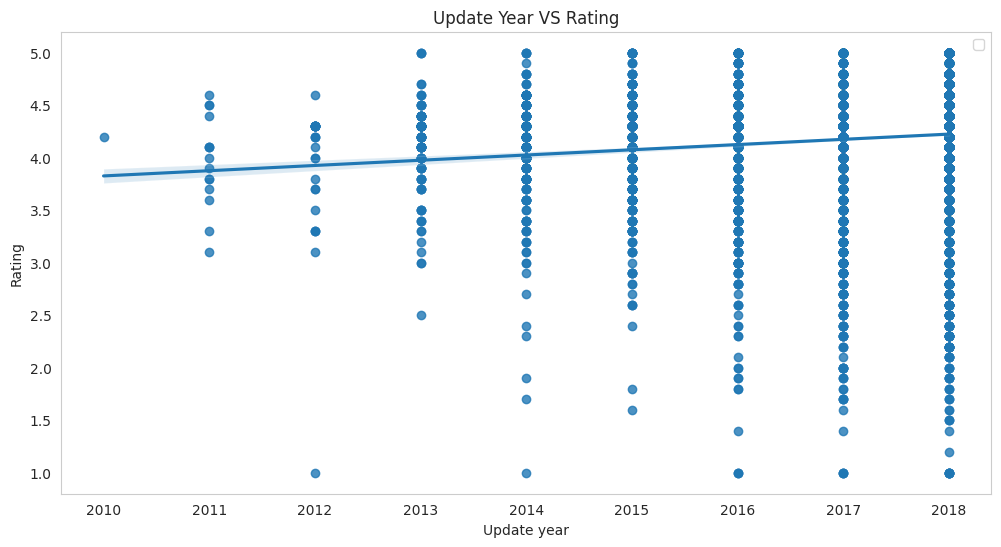

In [563]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=data)
plt.title("Update Year VS Rating")
plt.legend()
plt.show()

### distribution of the app over the year and months


In [564]:
paid_app["Update year"] = paid_app["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
free_apps["Update year"] = free_apps["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

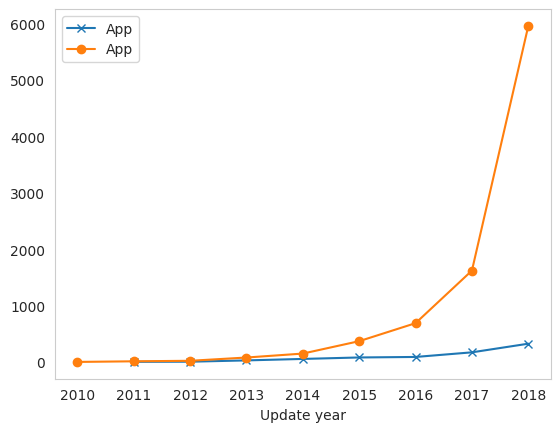

In [565]:
paid_app.groupby("Update year")["App"].count().plot.line(marker='x')
free_apps.groupby('Update year')['App'].count().plot.line(marker='o')
plt.legend()
plt.show()

In [566]:
# check the app update over a months
paid_app["Update month"] = paid_app["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 
free_apps["Update month"] = free_apps["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 

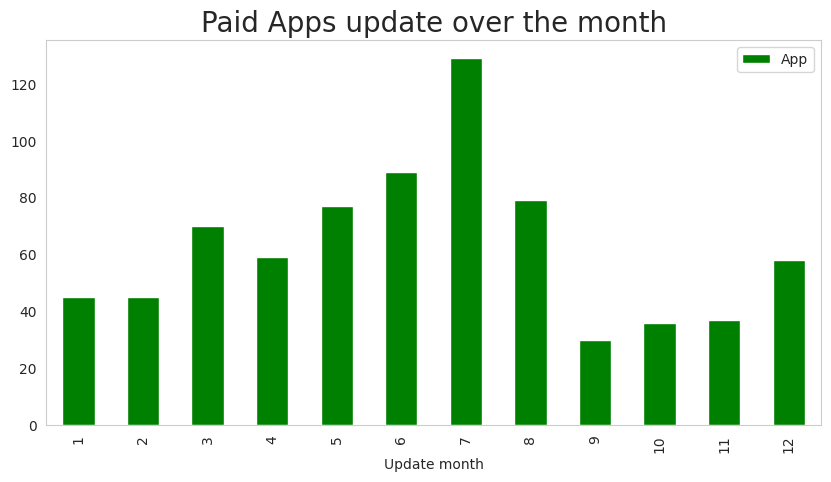

In [567]:
paid_app.groupby("Update month")["App"].count().plot.bar(figsize=(10,5), color= "green")
plt.title("Paid Apps update over the month", size=20)
plt.legend()
plt.show()

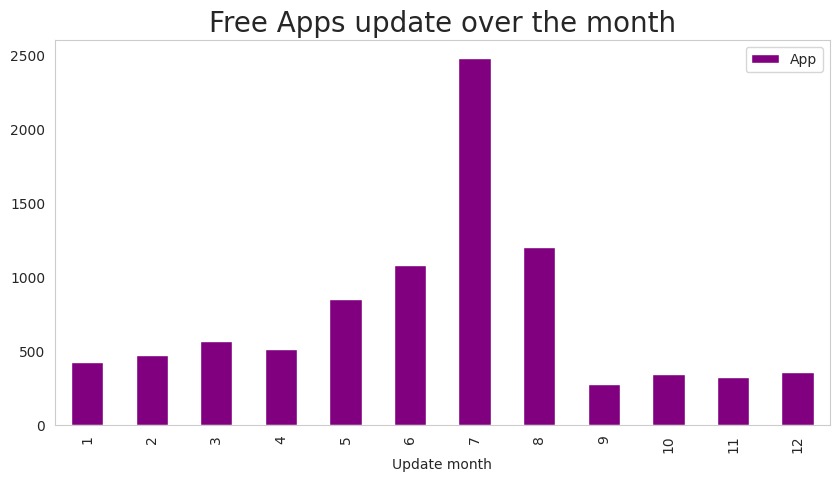

In [568]:
free_apps.groupby("Update month")["App"].count().plot.bar(figsize=(10,5), color='purple')
plt.title("Free Apps update over the month", size=20)
plt.legend()
plt.show()

# Challenges of the projects


1. Our major challenge was data cleaning.
2. 13.60% of reviews were NaN values, and even after merging both the dataframes, we could not infer much in order to fill them. Thus we had to drop them.
3. The merged data frame of both play store and user reviews, had only 816 common apps. This is just 10% of the cleaned data, we could have given more valuable analysis, if we had atleast 70% - 80% of the data available in the merged dataframes.
4. User Reviews had 42% of NaN values, which could have been used for developing an understanding of the category wise sentiments, which would help us to fill 13.60% NaN values of the Reviews column.
5. There is so much more which can be explored. Like we have current version, android version available which can be explored in detail and we can come out with more analysis where we can tell how does these things effect and needs to be kept in mind while developing app for the users.
6. We can explore the correlation between the size of the app and the version of Android on the number of installs.
7. Machine learning can help us to deploy more insights by developing models which can help us interpret even more better. We have left this as future work as this is something where we can work on.

# Analysis of the project outcomes


Play Store app review data analysis projects can provide valuable insights into user sentiments, preferences, and trends. Here are a few key aspects that are commonly analyzed in such projects:

**Sentiment Analysis:** One of the primary focuses is to determine the sentiment of app reviews. Sentiment analysis techniques, such as using machine learning or natural language processing algorithms, can be applied to classify reviews as positive, negative, or neutral. This analysis helps app developers and companies understand user feedback and gauge overall customer satisfaction.

**Topic Extraction:** App reviews often contain valuable information about specific features, functionalities, or issues. Topic extraction techniques, such as text clustering or topic modeling, can be employed to identify common themes or topics mentioned in the reviews. This allows developers to prioritize improvements, address bugs, or enhance specific features based on user feedback.

**Rating Distribution:** Analyzing the distribution of app ratings can provide insights into the overall satisfaction level of users. Visualizing the distribution of ratings, calculating average ratings, or examining changes in ratings over time can help identify trends and patterns, such as a sudden drop in ratings after an update or the impact of new features on user satisfaction.

**User Segmentation:** Segmenting users based on their reviews can help identify distinct user groups with varying preferences and sentiments. By grouping users into segments, developers can tailor their app updates, marketing campaigns, or customer support strategies to meet the specific needs of different user segments.

**Feature Analysis:** Analyzing user reviews can provide insights into the popularity and performance of specific app features. By identifying frequently mentioned features, analyzing sentiment associated with each feature, or tracking changes in user feedback over time, developers can gain a better understanding of which features are well-received, need improvement, or require further development.

**Competitive Analysis:** Analyzing app reviews can also involve comparing the performance of different apps within a particular category or niche. By examining user sentiments, ratings, or specific feature mentions across multiple apps, developers can gain insights into the strengths and weaknesses of their competitors, identify market gaps, and make informed decisions about app positioning and differentiation.